# Import packages

In [1]:
import importlib
import os
import numpy              as np
import pandas             as pd
import scipy              as sp
import matplotlib         as mpl
import matplotlib.pyplot  as plt
from   matplotlib.patches import Rectangle
from   matplotlib         import gridspec, rc
from   matplotlib.colors  import LinearSegmentedColormap
import mplhep             as hep
import my_cmaps           #kViridis, parula, jets
import my_files           as mf
import my_vectors         as mv
filepath = '../sig_npz_files/'
#filepath = '../bkg_npz_files/'
mf.filepath= filepath
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#mpl.rcParams['axes.formatter.limits']= (-4,4)
#mpl.rcParams['axes.formatter.use_mathtext'] = True
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.serif'] = ['Computer Modern']
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
from matplotlib.font_manager import FontProperties
verb = FontProperties()
verb.set_family("monospace")


../sig_npz_files/LeptonP.npz
../sig_npz_files/WmBoson.npz
../sig_npz_files/LpNu.npz
../sig_npz_files/WpBoson.npz
../sig_npz_files/MET.npz
../sig_npz_files/CGLMP.npz
../sig_npz_files/LeadLepton.npz
../sig_npz_files/LmNu.npz
../sig_npz_files/Higgs.npz
../sig_npz_files/subLeadLepton.npz
../sig_npz_files/xi_xyz.npz
../sig_npz_files/LeptonM.npz
../sig_npz_files/diLepton.npz


# Load Files

In [2]:
%%time

GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = mf.load_particle('LpNu.npz', None, GeV)
NeutrinoM = mf.load_particle('LmNu.npz', None, GeV)
WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
Higgs = mf.load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(['pt','px','py','phi']):
    W = 1 if i == 3 else GeV
    MET[j] = mf.load_evt('MET.npz',j,None)*W

diNeutrino = pd.DataFrame()
diNeutrino['E'  ] = NeutrinoP['E' ]+NeutrinoM['E' ]
diNeutrino['px' ] = NeutrinoP['px']+NeutrinoM['px']
diNeutrino['py' ] = NeutrinoP['py']+NeutrinoM['py']
diNeutrino['pz' ] = NeutrinoP['pz']+NeutrinoM['pz']
diNeutrino['m2' ] = mv.inv_mass_2(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['P'  ] = mv.vec_mag(diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['pt' ] = np.sqrt(diNeutrino['px']**2 + diNeutrino['py']**2)
diNeutrino['phi'] = np.arctan2(diNeutrino['py'],diNeutrino['px'])
diNeutrino['eta'] = np.arctanh(diNeutrino['pz']/diNeutrino['P'])

lp_leading = np.where(LeptonP['pt']>LeptonM['pt'],1,0)
lm_leading = np.where(LeptonP['pt']>LeptonM['pt'],0,1)
print(lp_leading.shape,lm_leading.shape,np.dot(lp_leading,lm_leading))
LeadingLep =   LeptonP.apply(lambda x : x*lp_leading) +   LeptonM.apply(lambda x : x*lm_leading)
SubleadLep =   LeptonP.apply(lambda x : x*lm_leading) +   LeptonM.apply(lambda x : x*lp_leading)
LeadingNu  = NeutrinoP.apply(lambda x : x*lp_leading) + NeutrinoM.apply(lambda x : x*lm_leading)
SubleadNu  = NeutrinoP.apply(lambda x : x*lm_leading) + NeutrinoM.apply(lambda x : x*lp_leading)
LeadingW   =   WBosonP.apply(lambda x : x*lp_leading) +   WBosonM.apply(lambda x : x*lm_leading)
SubleadW   =   WBosonP.apply(lambda x : x*lm_leading) +   WBosonM.apply(lambda x : x*lp_leading)
#########################################
positron = np.where(LeptonP['m'] < LeptonM['m'],1,0)
electron = np.where(LeptonM['m'] < LeptonP['m'],1,0)
pos_muon = np.where(LeptonP['m'] < LeptonM['m'],0,1)
neg_muon = np.where(LeptonM['m'] < LeptonP['m'],0,1)
Lepton_e = LeptonP.apply(lambda x : x*positron) + LeptonM.apply(lambda x : x*electron)
Lepton_mu = LeptonP.apply(lambda x : x*pos_muon) + LeptonM.apply(lambda x : x*neg_muon)

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

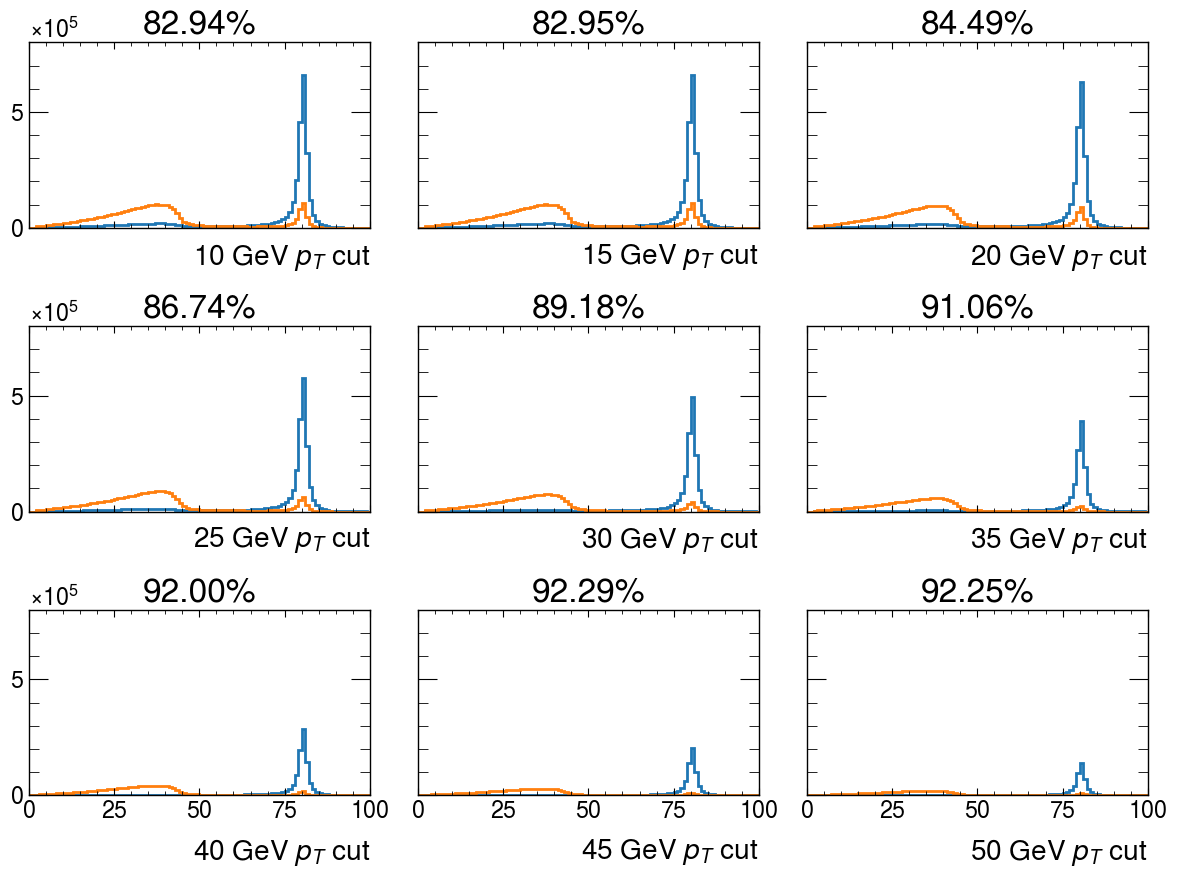

In [14]:
pt_threshold = np.linspace(10,50,9)
total_evt = len(LeadingLep['pt'])
remain_evt = []
on_shell_frac = []
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(12,9),tight_layout=True,sharex='col',sharey=True)
ax = ax.flatten()
nbins=100
for i in range(9):
    cut = np.where(LeadingLep['pt']>pt_threshold[i],True,False)
    on_shell = np.where(LeadingW['m'][cut]>SubleadW['m'][cut],True,False)
    remain_evt.append(len(cut[cut])/total_evt)
    on_shell_frac.append(len(on_shell[on_shell])/len(cut[cut]))
    ax[i].hist((LeadingW['m'][cut]),range=[0,100],bins=nbins,histtype='step',lw=2,label='leading $W$')
    ax[i].hist((SubleadW['m'][cut]),range=[0,100],bins=nbins,histtype='step',lw=2,label='sublead $W$')
    ax[i].set(xlabel=f'%d GeV $p_T$ cut'%(pt_threshold[i]),title='{:.2f}%'.format(100*len(on_shell[on_shell])/len(cut[cut])))
plt.show()

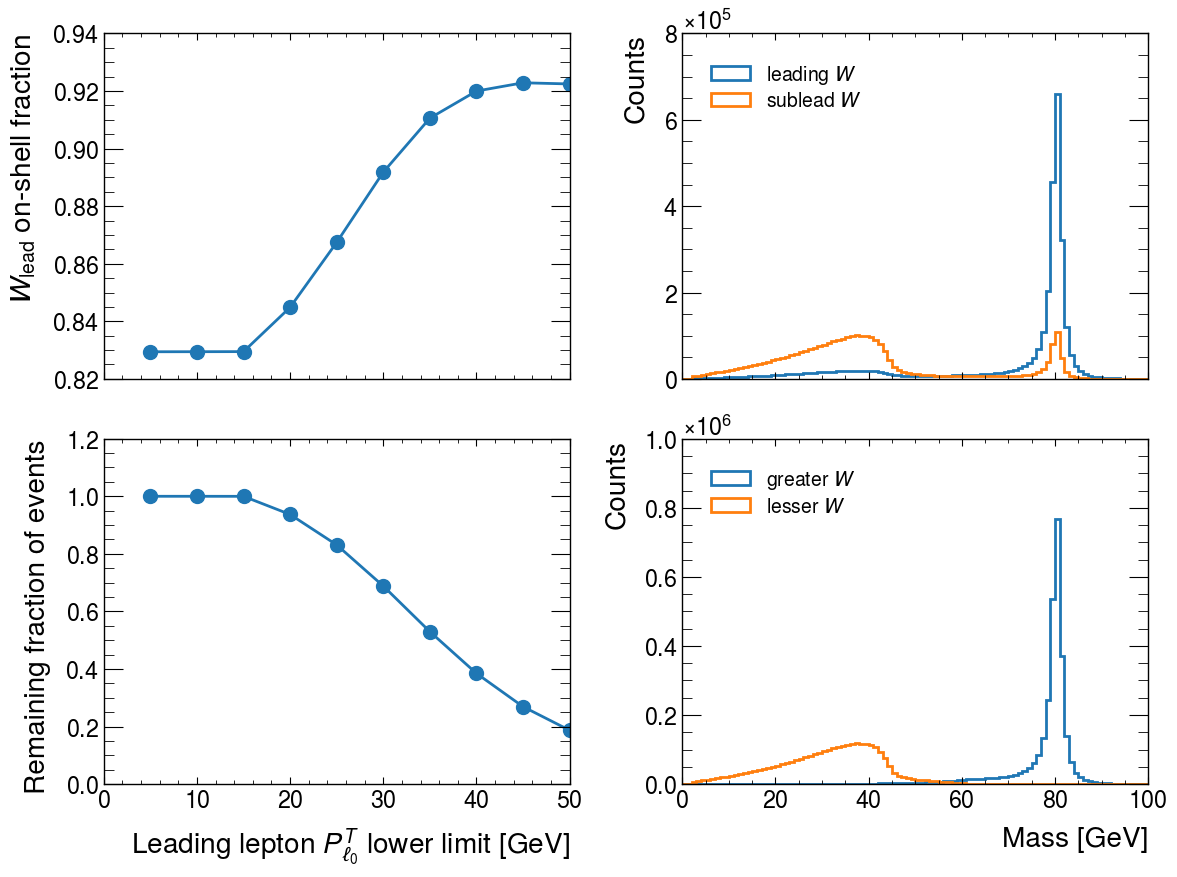

In [12]:

greater_w = np.where(LeadingW['m']>SubleadW['m'],LeadingW['m'],SubleadW['m'])
lesser_w = np.where( LeadingW['m']<SubleadW['m'],LeadingW['m'],SubleadW['m'])
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,9),tight_layout=True,sharex='col')
ax[0,0].plot(pt_threshold,on_shell_frac,lw=2,marker='o',markersize=10)
ax[1,0].plot(pt_threshold,remain_evt,lw=2,marker='o',markersize=10)
ax[0,1].hist((LeadingW['m']),range=[0,100],bins=nbins,histtype='step',lw=2,label='leading $W$')
ax[0,1].hist((SubleadW['m']),range=[0,100],bins=nbins,histtype='step',lw=2,label='sublead $W$')
ax[1,1].hist(greater_w,range=[0,100],bins=nbins,histtype='step',lw=2,label='greater $W$')
ax[1,1].hist( lesser_w,range=[0,100],bins=nbins,histtype='step',lw=2,label='lesser $W$')
ax[0,0].set(ylabel=r'$W_\mathrm{lead}$ on-shell fraction')
ax[1,0].set(ylabel=r'Remaining fraction of events',xlabel=r'Leading lepton $P^T_{\ell_0}$ lower limit [GeV]')
ax[0,1].set(ylabel='Counts',)
ax[1,1].set(ylabel='Counts',xlabel='Mass [GeV]')
ax[0,1].legend(loc=2)
ax[1,1].legend(loc=2)
plt.show()

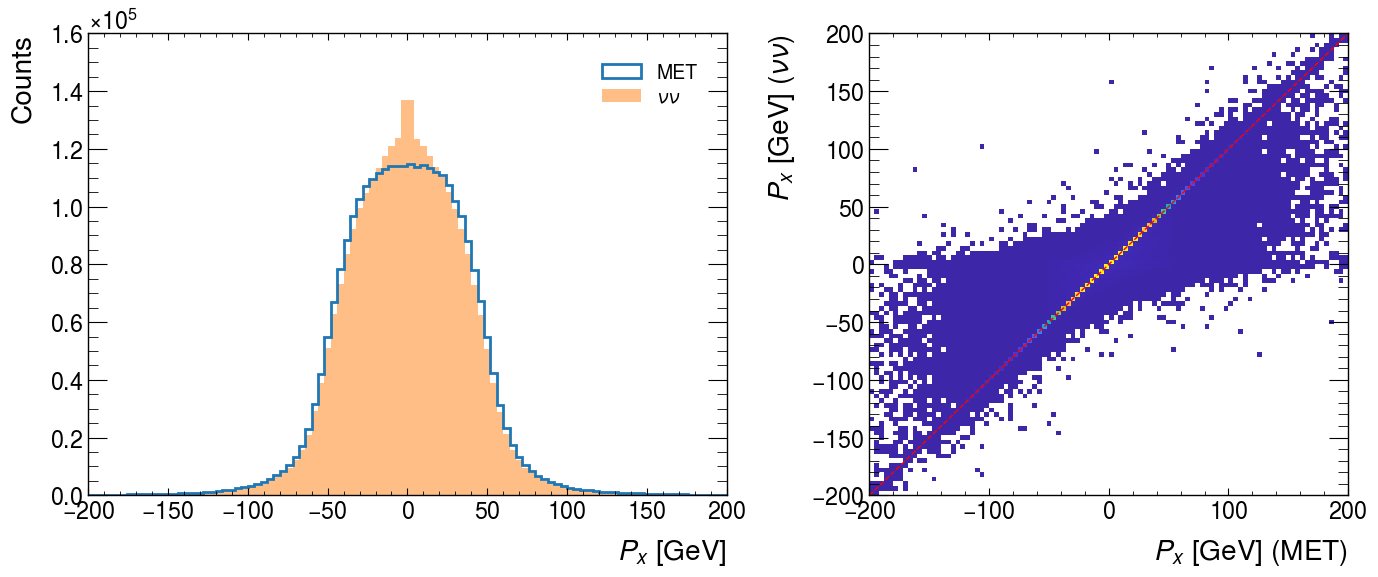

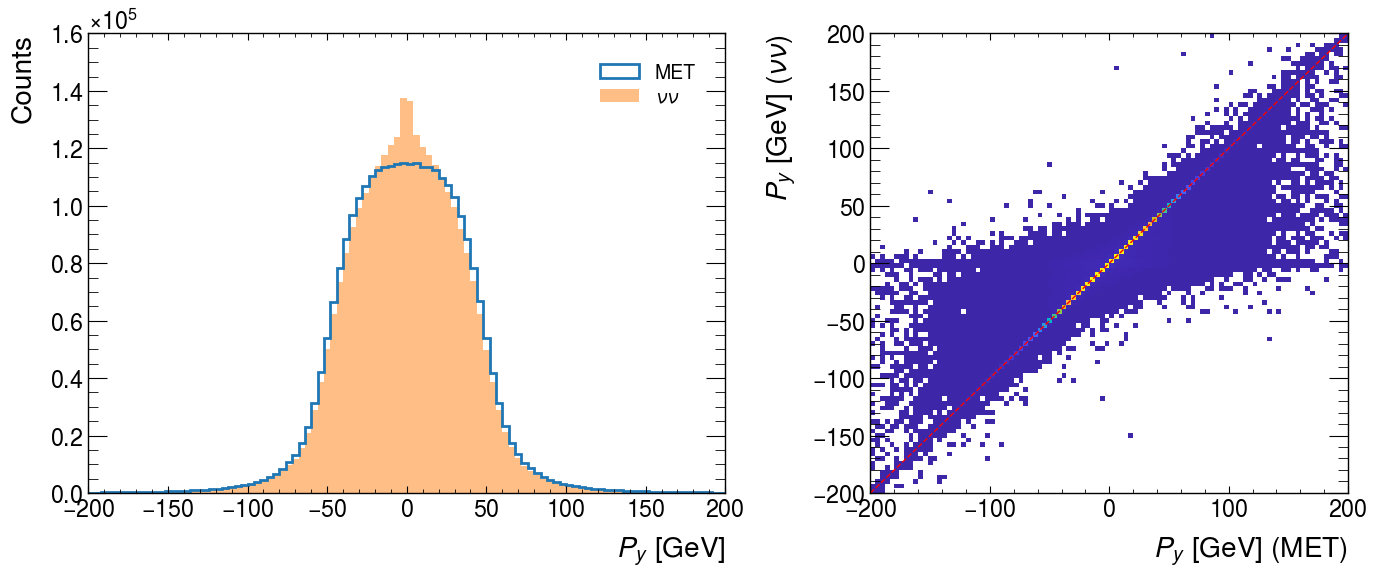

In [3]:
plt_range = [
    [-200,200],
    [-200,200],
]
plt_bins=100
xlabel = [
    r'$P_x$ [GeV]',
    r'$P_y$ [GeV]',
]
plt_names = [
    'original_truth_MET_Px',
    'original_truth_MET_Py'
]
for i in range(2):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6),gridspec_kw={'width_ratios':[8,6]},tight_layout=True)
    ax[0].hist(MET.iloc[:,i+1],range=plt_range[i],bins=plt_bins,histtype='step',lw=2,label='MET')
    ax[0].hist(diNeutrino.iloc[:,i+1],range=plt_range[i],bins=plt_bins,histtype='bar',alpha=0.5,label=r'$\nu\nu$')
    ax[1].hist2d(MET.iloc[:,i+1],diNeutrino.iloc[:,i+1],range=[plt_range[i],plt_range[i]],bins=[plt_bins,plt_bins],cmap=my_cmaps.parula("w"),vmin=1)
    ax[1].axline((0,0),(1,1),ls='dashed',color='r',lw=1)
    ax[0].set_ylabel("Counts")   
    ax[0].set_xlabel(xlabel[i])
    ax[1].set_ylabel(xlabel[i]+r' ($\nu\nu$)')
    ax[1].set_xlabel(xlabel[i]+r" (MET)")
    ax[0].legend()
    plt.savefig(plt_names[i]+'.pdf')
    plt.show()

In [3]:
CGLMP = pd.DataFrame()
f = np.load('../sig_npz_files/CGLMP.npz')
for i in f.files:
    CGLMP[i] = f[i]
CGLMP.describe()

,Bxy,Byz,Bzx
count,2.928862e+06,2.928862e+06,2.928862e+06
mean,2.213677e+00,2.492206e+00,2.742281e+00
std,1.191908e+01,9.612033e+00,1.004009e+01
min,-2.510560e+01,-2.509950e+01,-2.509940e+01
25%,-5.644915e+00,-2.521510e+00,-2.678350e+00
50%,1.277255e+00,7.785235e-01,1.002725e+00
75%,1.064920e+01,7.815290e+00,8.626610e+00
max,2.961860e+01,2.961020e+01,2.961660e+01


# Apply selection cuts

In [4]:
%%time
#a = np.where(Lepton_e['eta']**2 < 2.5**2, True, False)
#b = np.where(Lepton_mu['eta']**2 < 2.5**2, True, False)
#lep_eta_cut = a&b # Detector Geometry
#########################################
a = np.where(LeadingLep['pt'] >  22, True, False)
b = np.where(SubleadLep['pt'] >  15, True, False)
#c = np.where(LeadingLep['pt'] < 100, True, False)
#d = np.where(SubleadLep['pt'] <  50, True, False)
lep_PT_cut = a&b#&c&d # Preselection
#########################################
a = np.where(MET['pt'] >  20, True, False) # Preselection
#b = np.where(MET['pt'] < 150, True, False)
MET_cut = a#&b
#########################################
a = np.where(diLepton['m'] >  10, True, False) # Preselection
#b = np.where(diLepton['m'] < 100, True, False) # Topology
diLep_mass_cut = a#&b # Preselection and Topology
#########################################
#diLep_PT_cut = np.where(diLepton['pt']>30, True, False) # Background rejection
#########################################
#diLep_MET_dPhi_cut = np.where( np.cos(diLepton['phi'] - MET['phi']) < 0, True, False) # Background rejection
#########################################
#diLep_dPhi_cut = np.where( np.cos(LeptonP['phi']-LeptonM['phi']) > np.cos(1.8), True, False) # Topology
selection_cuts =  lep_PT_cut & MET_cut & diLep_mass_cut #& lep_eta_cut &  diLep_PT_cut & diLep_dPhi_cut & diLep_MET_dPhi_cut
#selection cut =  lep_PT_cut & MET_cut & diLep_mass_cut & diLep_PT_cut & diLep_dPhi_cut & diLep_MET_dPhi_cut
#########################################
#ET = np.sqrt( diLepton['m']**2 + MET['pt']**2 )
#ET_cuts = np.where( ( (ET + MET['pt'])**2 - (diLepton['px'] + MET['px'])**2 - (diLepton['py'] + MET['py'])**2 )> 0 , True, False )
#########################################
'''
a = np.where(LeadingLep['E' ] < 400,True,False)
b = np.where(SubleadLep['E' ] < 200,True,False)
c = np.where(diNeutrino['E' ] < 600,True,False)
E_cut = a&b&c
#########################################
a = np.where(LeadingLep['px']**2 < 10000,True,False)
b = np.where(SubleadLep['px']**2 < 2500 ,True,False)
c = np.where(diNeutrino['px']**2 < 22500,True,False)
px_cut = a&b&c
#########################################
a = np.where(LeadingLep['py']**2 < 10000,True,False)
b = np.where(SubleadLep['py']**2 < 2500 ,True,False)
c = np.where(diNeutrino['py']**2 < 22500,True,False)
py_cut = a&b&c
#########################################
a = np.where(LeadingLep['pz']**2 < 160000,True,False)
b = np.where(SubleadLep['pz']**2 < 40000 ,True,False)
c = np.where(diNeutrino['pz']**2 < 360000,True,False)
pz_cut = a&b&c
feature_cuts = a&b&c
'''
#########################################
all_cuts = selection_cuts # & feature_cuts
print(np.unique(all_cuts,return_counts=True))
#########################################
Higgs      =      Higgs.iloc[all_cuts,::].reset_index()
WBosonP    =    WBosonP.iloc[all_cuts,::].reset_index()
WBosonM    =    WBosonM.iloc[all_cuts,::].reset_index()
LeptonP    =    LeptonP.iloc[all_cuts,::].reset_index()
LeptonM    =    LeptonM.iloc[all_cuts,::].reset_index()
diLepton   =   diLepton.iloc[all_cuts,::].reset_index()
NeutrinoP  =  NeutrinoP.iloc[all_cuts,::].reset_index()
NeutrinoM  =  NeutrinoM.iloc[all_cuts,::].reset_index()
MET        =        MET.iloc[all_cuts,::].reset_index()
diNeutrino = diNeutrino.iloc[all_cuts,::].reset_index()
LeadingLep = LeadingLep.iloc[all_cuts,::].reset_index()
SubleadLep = SubleadLep.iloc[all_cuts,::].reset_index()
LeadingNu  =  LeadingNu.iloc[all_cuts,::].reset_index()
SubleadNu  =  SubleadNu.iloc[all_cuts,::].reset_index()
LeadingW   =   LeadingW.iloc[all_cuts,::].reset_index()
SubleadW   =   SubleadW.iloc[all_cuts,::].reset_index()
CGLMP_pre  =      CGLMP.iloc[all_cuts,::].reset_index()

(array([False,  True]), array([1549025, 1379837]))
CPU times: user 792 ms, sys: 79.1 ms, total: 872 ms
Wall time: 872 ms


In [40]:
%%time
mv.BoostToRest(WBosonP,'Wp',None,Higgs,'H',None) # Boost W to Higgs rest frame
mv.BoostToRest(WBosonM,'Wm',None,Higgs,'H',None)
mv.BoostToRest(LeptonP,'lp',None,Higgs,'H',None) #Boost leptons to Higgs rest frame
mv.BoostToRest(LeptonM,'lm',None,Higgs,'H',None)
xi_p = np.zeros((len(WBosonP['px_H']),3))
xi_m = np.zeros((len(WBosonM['px_H']),3))
#W Boson in Higgs rest frame 
beam = mv.LorentzVector(0,0,1,1)
def four_momentum(particle, p4, idx):
    if p4 == None: p4=['E','px','py','pz']
    return mv.LorentzVector(particle[p4[1]][idx],particle[p4[2]][idx],particle[p4[3]][idx],particle[p4[0]][idx])

for i in range(len(WBosonP['E'])):
    higgs_p3 = four_momentum(Higgs,None,i).BoostVector()
    lp_lab   = four_momentum(LeptonP,None,i)
    lm_lab   = four_momentum(LeptonM,None,i)
    wp_lab   = four_momentum(WBosonP, None, i)
    wm_lab   = four_momentum(WBosonM, None, i)
    # boosting to Higgs rest frame
    lp_H = lp_lab.Boost(-1*higgs_p3)
    lm_H = lm_lab.Boost(-1*higgs_p3)
    wp_H = wp_lab.Boost(-1*higgs_p3)
    wm_H = wm_lab.Boost(-1*higgs_p3)
    # From the higgs rest frame, boost leptons to W boson rest frame
    lp_WH = lp_H.Boost(-1*wp_H.BoostVector())
    lm_WH = lm_H.Boost(-1*wm_H.BoostVector())
    # coordinate definition
    p_vect_H = beam.Boost(-1*higgs_p3)
    p_vect   = p_vect_H.P3().unit()
    k_vect   = wp_H.P3().unit()
    y = p_vect.dot(k_vect)
    R = np.sqrt(1 - y**2)
    r_vect = (p_vect - y*k_vect).unit()
    n_vect = (p_vect.cross(k_vect)).unit()
    # calculate directional cosines
    xi_p[i,0] = n_vect.cos(lp_WH.P3())
    xi_p[i,1] = r_vect.cos(lp_WH.P3())
    xi_p[i,2] = k_vect.cos(lp_WH.P3())
    xi_m[i,0] = n_vect.cos(lm_WH.P3())
    xi_m[i,1] = r_vect.cos(lm_WH.P3())
    xi_m[i,2] = k_vect.cos(lm_WH.P3())
    if (i%100000==0): print(i,' events processed')

0  events processed
100000  events processed
200000  events processed
300000  events processed
400000  events processed
500000  events processed
600000  events processed
700000  events processed
800000  events processed
900000  events processed
1000000  events processed
1100000  events processed
1200000  events processed
1300000  events processed
CPU times: user 3min 11s, sys: 80.1 ms, total: 3min 11s
Wall time: 3min 9s


In [41]:
def CGLMP_Bij(pi,pj,mi,mj):
    O1 = (pi*mi + pj*mj)*(8/np.sqrt(3))
    O2 =((pi**2 - pj**2)*(mi**2 - mj**2))*25 
    O3 = (pi*pj*mi*mj)*100 
    return O1 + O2 + O3
B_xy = CGLMP_Bij(xi_p[:,0],xi_p[:,1],xi_m[:,0],xi_m[:,1])
B_yz = CGLMP_Bij(xi_p[:,1],xi_p[:,2],xi_m[:,1],xi_m[:,2])
B_zx = CGLMP_Bij(xi_p[:,2],xi_p[:,0],xi_m[:,2],xi_m[:,0])

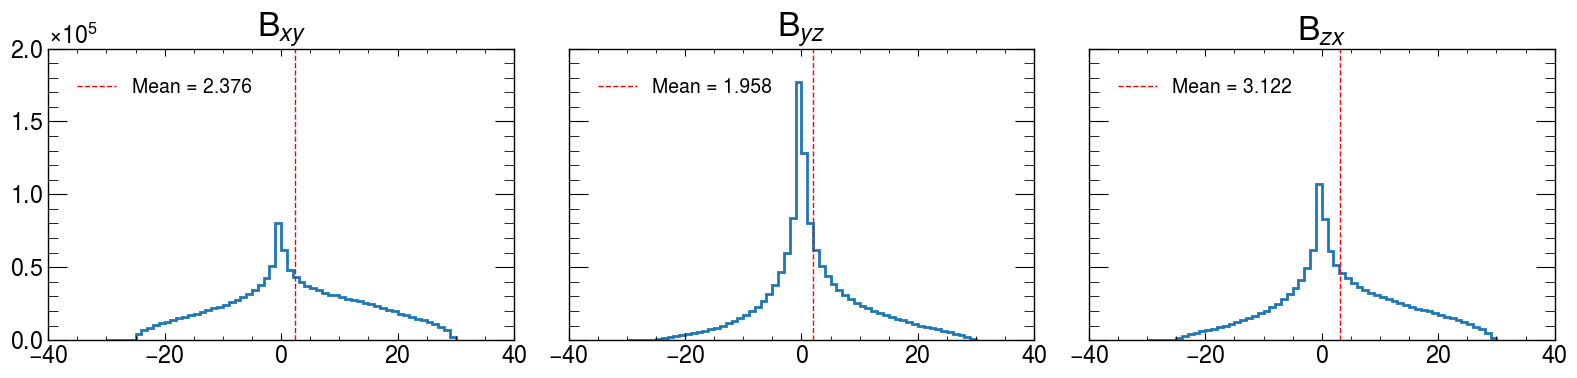

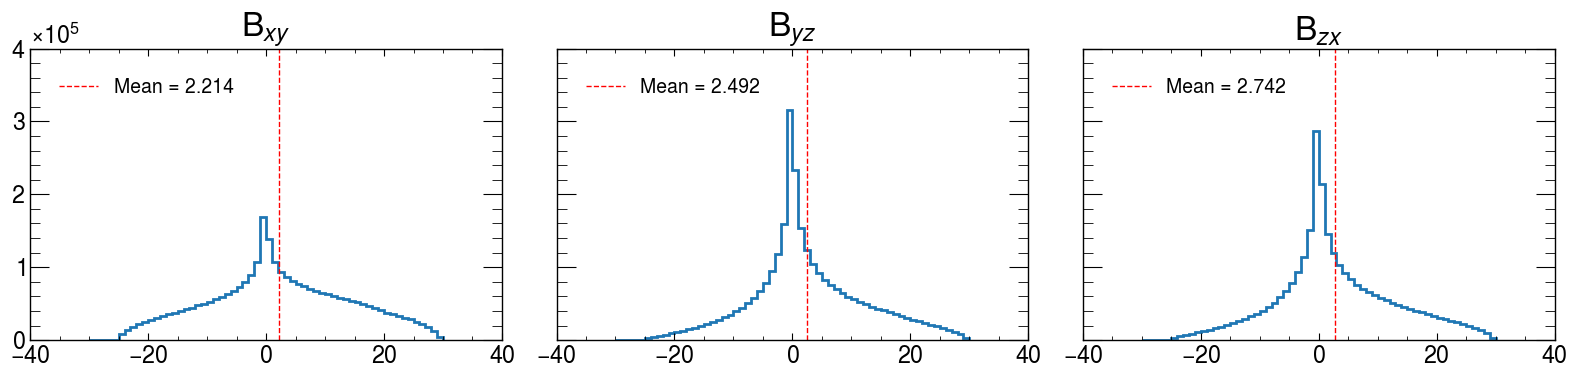

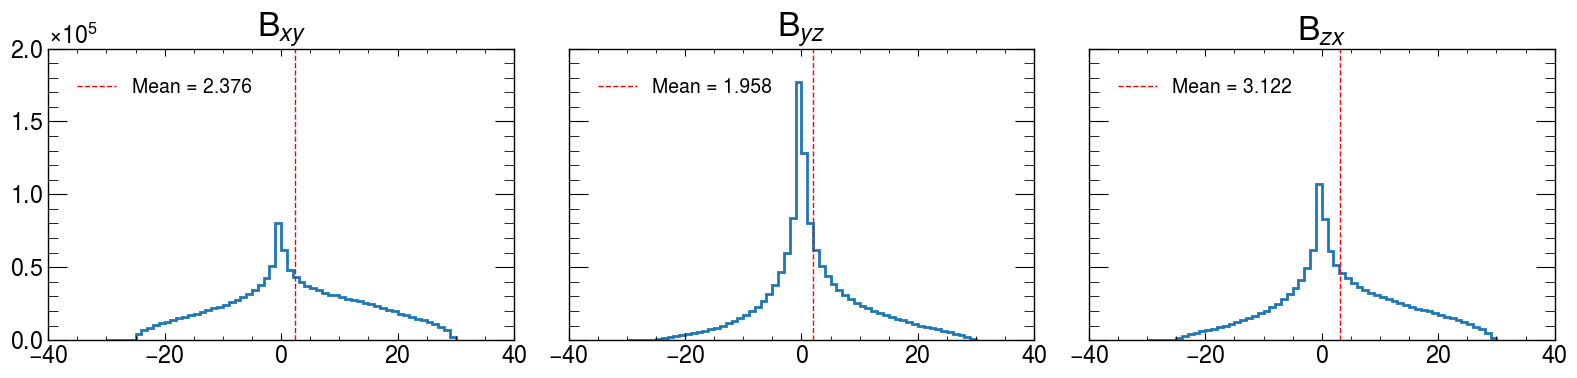

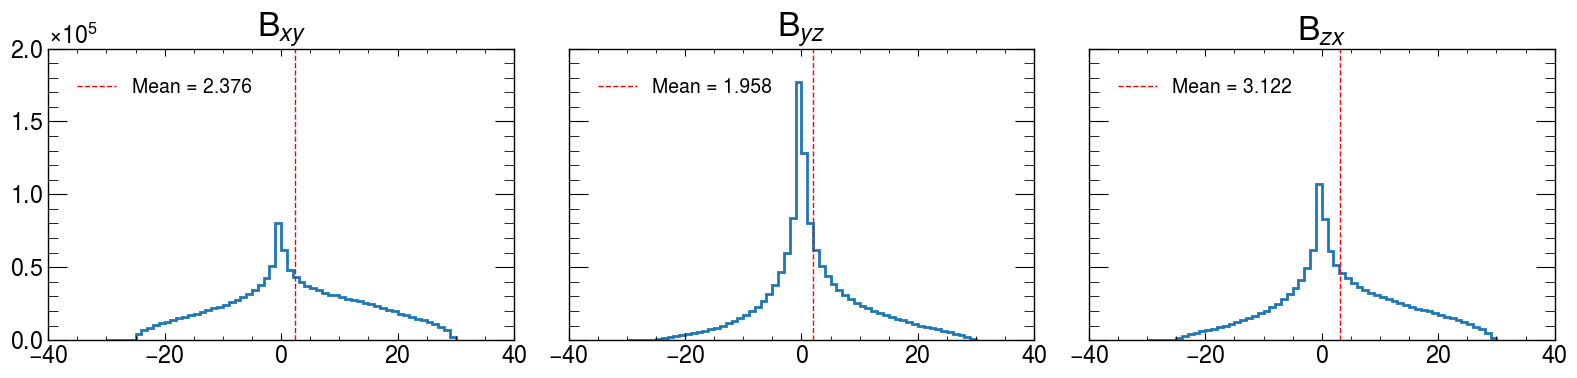

In [43]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4),sharey=True,sharex=True,tight_layout=True)
ax = ax.flatten()
plt_bins=60
plt_range = [-30,30]
for i,j in enumerate(CGLMP.columns):
    ax[i].hist(CGLMP[j],range=plt_range,bins=plt_bins,histtype='step',lw=2)
    ax[i].axvline(CGLMP[j].mean(),lw=1,ls='dashed',c='r',label = f'Mean = {CGLMP[j].mean():.3f}')
    if i == 0:
        ax[i].set_title(r"$\mathcal{B}_{xy}$")
    if i == 1:
        ax[i].set_title(r"$\mathcal{B}_{yz}$")
    if i == 2:
        ax[i].set_title(r"$\mathcal{B}_{zx}$")
    ax[i].legend()
plt.show()

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4),sharey=True,sharex=True,tight_layout=True)
ax = ax.flatten()
plt_bins=60
plt_range = [-30,30]
for i,j in enumerate(CGLMP_pre.columns[1::]):
    ax[i].hist(CGLMP_pre[j],range=plt_range,bins=plt_bins,histtype='step',lw=2)
    ax[i].axvline(CGLMP_pre[j].mean(),lw=1,ls='dashed',c='r',label = f'Mean = {CGLMP_pre[j].mean():.3f}')
    if i == 0:
        ax[i].set_title(r"$\mathcal{B}_{xy}$")
    if i == 1:
        ax[i].set_title(r"$\mathcal{B}_{yz}$")
    if i == 2:
        ax[i].set_title(r"$\mathcal{B}_{zx}$")
    ax[i].legend()
plt.show()

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4),sharey=True,sharex=True,tight_layout=True)
ax = ax.flatten()
plt_bins=60
plt_range = [-30,30]
for i,j in enumerate([B_xy,B_yz,B_zx]):
    ax[i].hist(j,range=plt_range,bins=plt_bins,histtype='step',lw=2)
    ax[i].axvline(np.mean(j),lw=1,ls='dashed',c='r',label = f'Mean = {np.mean(j):.3f}')
    if i == 0:
        ax[i].set_title(r"$\mathcal{B}_{xy}$")
    if i == 1:
        ax[i].set_title(r"$\mathcal{B}_{yz}$")
    if i == 2:
        ax[i].set_title(r"$\mathcal{B}_{zx}$")
    ax[i].legend()
plt.show()

In [122]:
f1 = np.load("weighting_100K_1.npz")
f2 = np.load("weighting_100K_2.npz")
print(f1.files)
print(f1['cuts'].shape)
print(f2['cuts'].shape)
all_cuts = f1['cuts']
Higgs      =      Higgs.iloc[all_cuts,::].reset_index()
WBosonP    =    WBosonP.iloc[all_cuts,::].reset_index()
WBosonM    =    WBosonM.iloc[all_cuts,::].reset_index()
LeptonP    =    LeptonP.iloc[all_cuts,::].reset_index()
LeptonM    =    LeptonM.iloc[all_cuts,::].reset_index()
diLepton   =   diLepton.iloc[all_cuts,::].reset_index()
NeutrinoP  =  NeutrinoP.iloc[all_cuts,::].reset_index()
NeutrinoM  =  NeutrinoM.iloc[all_cuts,::].reset_index()
MET        =        MET.iloc[all_cuts,::].reset_index()
diNeutrino = diNeutrino.iloc[all_cuts,::].reset_index()
LeadingLep = LeadingLep.iloc[all_cuts,::].reset_index()
SubleadLep = SubleadLep.iloc[all_cuts,::].reset_index()
LeadingNu  =  LeadingNu.iloc[all_cuts,::].reset_index()
SubleadNu  =  SubleadNu.iloc[all_cuts,::].reset_index()
LeadingW   =   LeadingW.iloc[all_cuts,::].reset_index()
SubleadW   =   SubleadW.iloc[all_cuts,::].reset_index()


['cuts', 'evt_id', 'w_mass_truth', 'w_mass_est', 'nu_eta_truth', 'nu_eta_est']
(2928862,)
(2928862,)


In [129]:
comb_sample = pd.DataFrame()
N = 1100000
comb_sample['evt_id_1'   ] = np.full(N,-1)
comb_sample['wm_truth_1' ] = np.zeros(N)
comb_sample['wm_est_1'   ] = np.zeros(N)
comb_sample['eta_truth_1'] = np.zeros(N)
comb_sample['eta_est_1'  ] = np.zeros(N)
comb_sample['evt_id_2'   ] = np.full(N,-1)
comb_sample['wm_truth_2' ] = np.zeros(N)
comb_sample['wm_est_2'   ] = np.zeros(N)
comb_sample['eta_truth_2'] = np.zeros(N)
comb_sample['eta_est_2'  ] = np.zeros(N)

In [130]:
comb_sample.loc[f1['evt_id'],'evt_id_1'   ] = f1['evt_id'      ]
comb_sample.loc[f1['evt_id'],'wm_truth_1' ] = f1['w_mass_truth']
comb_sample.loc[f1['evt_id'],'wm_est_1'   ] = f1['w_mass_est'  ]
comb_sample.loc[f1['evt_id'],'eta_truth_1'] = f1['nu_eta_truth']
comb_sample.loc[f1['evt_id'],'eta_est_1'  ] = f1['nu_eta_est'  ]

comb_sample.loc[f2['evt_id'],'evt_id_2'   ] = f2['evt_id'      ]
comb_sample.loc[f2['evt_id'],'wm_truth_2' ] = f2['w_mass_truth']
comb_sample.loc[f2['evt_id'],'wm_est_2'   ] = f2['w_mass_est'  ]
comb_sample.loc[f2['evt_id'],'eta_truth_2'] = f2['nu_eta_truth']
comb_sample.loc[f2['evt_id'],'eta_est_2'  ] = f2['nu_eta_est'  ]


In [135]:
comb_sample['id_1' ] = np.where(comb_sample['evt_id_1']==-1,0,1)
comb_sample['id_2' ] = np.where(comb_sample['evt_id_2']==-1,0,1)
comb_sample['id_3' ] = comb_sample['id_1' ] +comb_sample['id_2' ] 
comb_sample['id_21'] = np.where(comb_sample['id_3'] == 2,0,comb_sample['id_2'])
print(np.unique(comb_sample['id_1' ],return_counts=True))
print(np.unique(comb_sample['id_2' ],return_counts=True))
print(np.unique(comb_sample['id_3' ],return_counts=True))
print(np.unique(comb_sample['id_21'],return_counts=True))

(array([0, 1]), array([1000000,  100000]))
(array([0, 1]), array([1000000,  100000]))
(array([0, 1, 2]), array([909208, 181584,   9208]))
(array([0, 1]), array([1009208,   90792]))


In [107]:
comb_sample['id_2'] = np.where(comb_sample['id_21'] != 2,comb_sample['evt_id_2'],0)
print(np.unique(comb_sample['id_21'],return_counts=True,return_index=True))
print(np.unique(comb_sample['id_2'],return_counts=True,return_index=True))
print(np.unique(comb_sample['evt_id_2'],return_counts=True,return_index=True))
print(np.unique(comb_sample['evt_id_1'],return_counts=True,return_index=True))

(array([0., 1., 2.]), array([  1,   0, 233]), array([896528, 181584,   9208]))
(array([0., 1.]), array([1, 0]), array([996528,  90792]))
(array([0., 1.]), array([1, 0]), array([987320, 100000]))
(array([0., 1.]), array([0, 5]), array([987320, 100000]))


# Pairwise features

In [122]:
## mv.BoostToRest(LeadingNu,'nu1',None,Higgs,'H',None)
#mv.BoostToRest(SubleadNu,'nu2',None,Higgs,'H',None)
LeadingNu['pt_H' ] = np.sqrt( LeadingNu['px_H']**2 + LeadingNu['py_H']**2)
SubleadNu['pt_H' ] = np.sqrt( SubleadNu['px_H']**2 + SubleadNu['py_H']**2)
LeadingNu['eta_H'] = np.arctanh( LeadingNu['pz_H']/mv.vec_mag(LeadingNu['px_H'],LeadingNu['py_H'],LeadingNu['pz_H']) )
SubleadNu['eta_H'] = np.arctanh( SubleadNu['pz_H']/mv.vec_mag(SubleadNu['px_H'],SubleadNu['py_H'],SubleadNu['pz_H']) )
#LeadingNu['eta_H'] = 0.5*np.log( (LeadingNu['E_H']+LeadingNu['pz_H'])/(LeadingNu['E_H']-LeadingNu['pz_H']) ) 
#SubleadNu['eta_H'] = 0.5*np.log( (SubleadNu['E_H']+SubleadNu['pz_H'])/(SubleadNu['E_H']-SubleadNu['pz_H']) ) 
LeadingNu['phi_H'] = np.arctan2(LeadingNu['py_H'],LeadingNu['px_H'])
SubleadNu['phi_H'] = np.arctan2(SubleadNu['py_H'],SubleadNu['px_H'])
LeadingNu.columns

Index(['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'px_H', 'py_H', 'pz_H',
       'E_H', 'pt_H', 'eta_H', 'phi_H'],
      dtype='object')

In [41]:
fig = plt.figure(figsize=(8,8))
plt.hist()

0.9866666666666667
2.5607215362144067e-05


In [61]:
PT_cuts = np.linspace(0,50,10)
leading_N = []
sublead_N = []
missing_N = []
diLep_N   = []
leading_R = []
sublead_R = []
missing_R = []
diLep_R   = []
total = len(LeadingW['m'])
for i in range(10):
    LeadW_on_shell = np.where(LeadingW['m']>SubleadW['m'],True,False)
    
    leading_pt = np.where(LeadingLep['pt']>PT_cuts[i],True,False)
    N = leading_pt.tolist().count(True) # events to pass selection
    _,freq = np.unique(leading_pt&LeadW_on_shell,return_counts=True) # intersection
    leading_R.append(freq[1]/N)
    leading_N.append(N/total)
    
    sublead_pt = np.where(SubleadLep['pt']>PT_cuts[i],True,False)
    N = sublead_pt.tolist().count(True) # events to pass selection
    _,freq = np.unique(sublead_pt&LeadW_on_shell,return_counts=True) # intersection
    sublead_R.append(freq[1]/N)
    sublead_N.append(N/total)
    
    diLep_pt   = np.where(  diLepton['pt']>PT_cuts[i],True,False)
    N = diLep_pt.tolist().count(True) # events to pass selection
    _,freq = np.unique(diLep_pt&LeadW_on_shell,return_counts=True) # intersection
    diLep_R.append(freq[1]/N)
    diLep_N.append(N/total)
    
    missing_pt = np.where(       MET['pt']>PT_cuts[i],True,False)
    N = missing_pt.tolist().count(True) # events to pass selection
    _,freq = np.unique(missing_pt&LeadW_on_shell,return_counts=True) # intersection
    missing_R.append(freq[1]/N)
    missing_N.append(N/total)

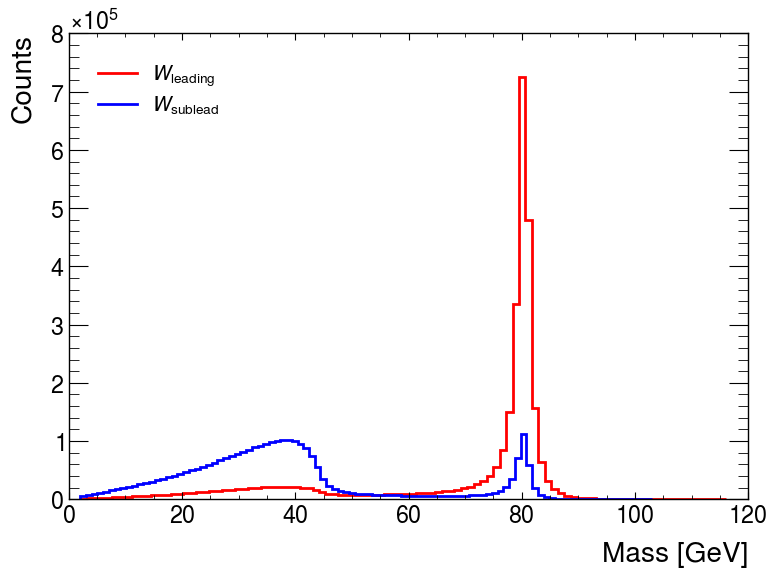

In [52]:

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6),tight_layout=True)

leading_bar,leading_bin = np.histogram(LeadingW['m'],bins=100)#,range=[0,120])
sublead_bar,sublead_bin = np.histogram(SubleadW['m'],bins=100)#,range=[0,120])
hep.histplot(leading_bar,leading_bin,color='r',ax=ax,lw=2,label=r'$W_\mathrm{leading}$')
hep.histplot(sublead_bar,sublead_bin,color='b',ax=ax,lw=2,label=r'$W_\mathrm{sublead}$')
ax.set_xlabel('Mass [GeV]')
ax.set_ylabel('Counts')
ax.legend(loc=2)
#leading_bar,leading_bin = np.histogram(LeadingW['m'][LeadingW['m']>SubleadW['m']],bins=50,range=[0,100])
#hep.histplot(leading_bar,leading_bin,color='b',ax=ax[1],lw=2,label=r'$W_\mathrm{leading}$')
#ax[1].set_title(r"$m_{W_\mathrm{leading}}$ ($m_{W_\mathrm{leading}}>m_{W_\mathrm{sublead}}$ events)")
#ax[1].set_ylabel('Counts')
#ax[1].set_xlabel('Mass [GeV]')
plt.show()

Text(1, 0, 'Mass [GeV]')

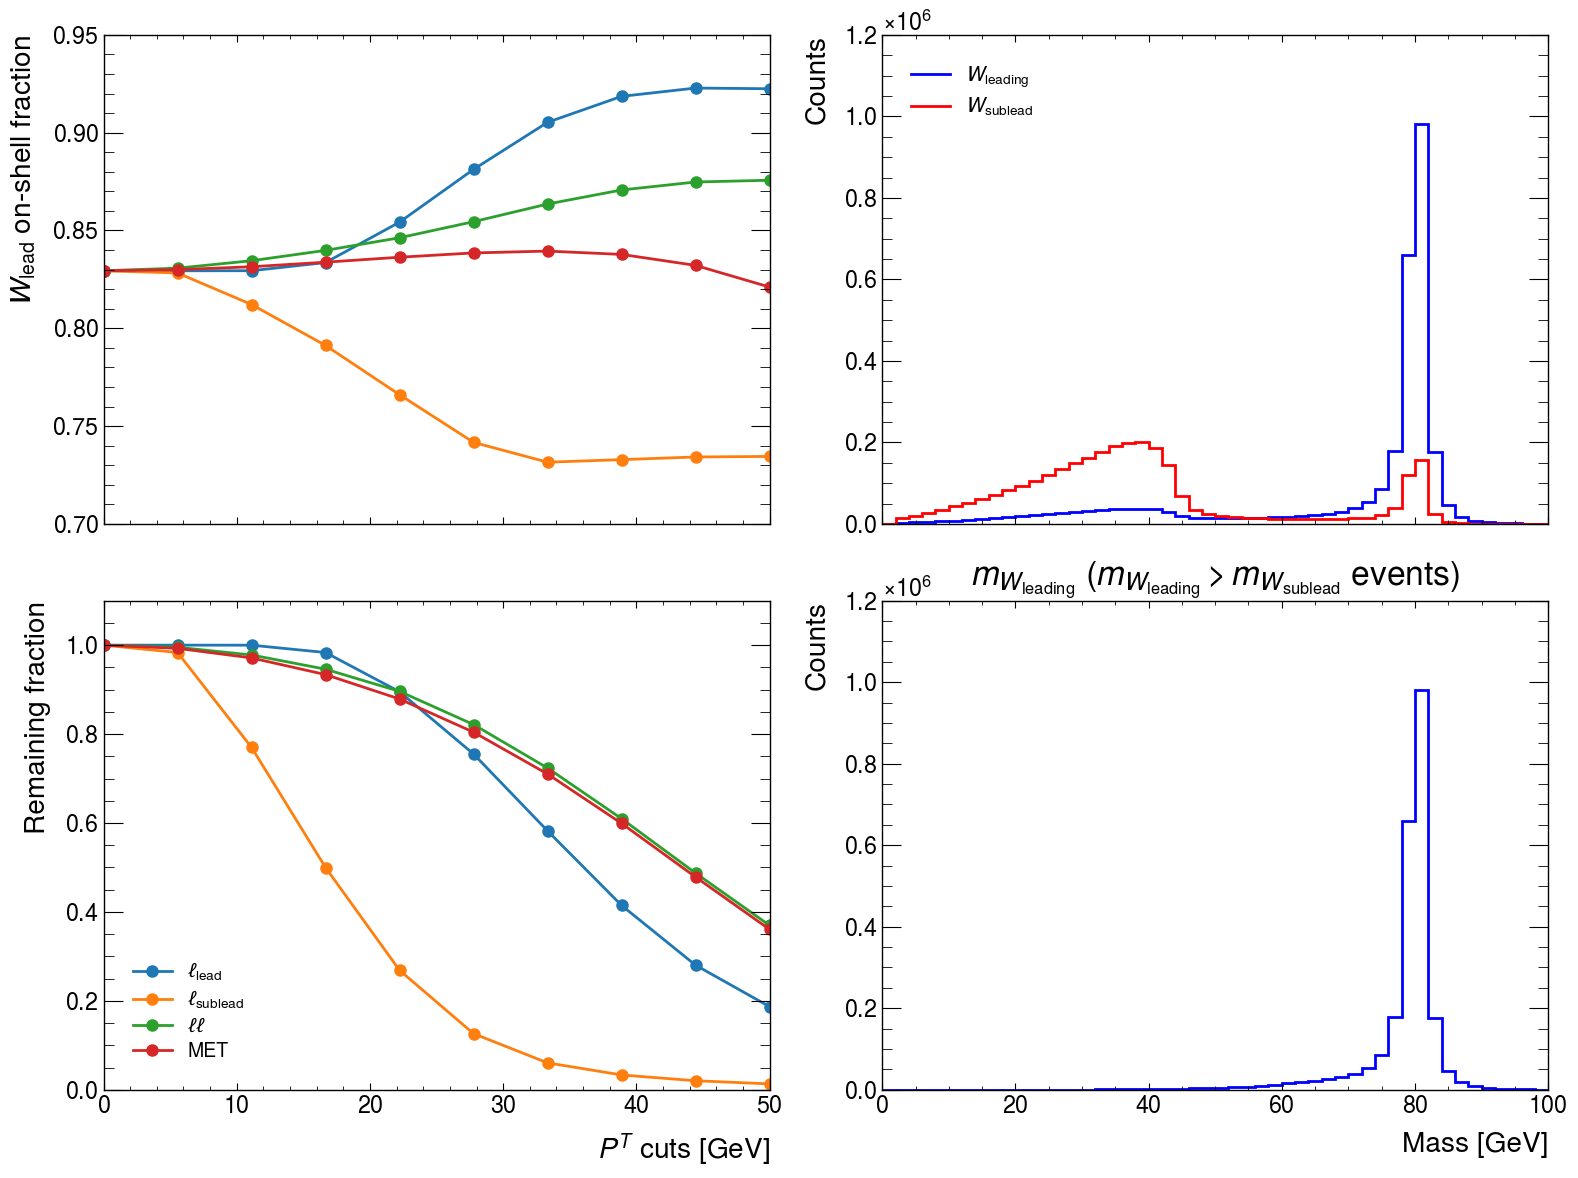

In [164]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,12),tight_layout=True,sharex='col')
ax=ax.flatten()
ax[0].plot(PT_cuts,leading_R, label=r'$\ell_\mathrm{lead}$',marker='o')
ax[0].plot(PT_cuts,sublead_R, label=r'$\ell_\mathrm{sublead}$',marker='o')
ax[0].plot(PT_cuts,diLep_R   ,label=r'$\ell\ell$',marker='o')
ax[0].plot(PT_cuts,missing_R ,label='MET',marker='o')
#ax[0].set_xlabel(r'$P^T$ cuts [GeV]')
ax[0].set_ylabel(r'$W_\mathrm{lead}$ on-shell fraction')
ax[2].plot(PT_cuts,leading_N, label=r'$\ell_\mathrm{lead}$',marker='o')
ax[2].plot(PT_cuts,sublead_N, label=r'$\ell_\mathrm{sublead}$',marker='o')
ax[2].plot(PT_cuts,diLep_N   ,label=r'$\ell\ell$',marker='o')
ax[2].plot(PT_cuts,missing_N ,label='MET',marker='o')
ax[2].set_ylim([0,1.1])
ax[2].legend(loc=3)
ax[2].set_xlabel(r'$P^T$ cuts [GeV]')
ax[2].set_ylabel(r'Remaining fraction')
leading_bar,leading_bin = np.histogram(LeadingW['m'],bins=50,range=[0,100])
sublead_bar,sublead_bin = np.histogram(SubleadW['m'],bins=50,range=[0,100])
hep.histplot(leading_bar,leading_bin,color='b',ax=ax[1],lw=2,label=r'$W_\mathrm{leading}$')
hep.histplot(sublead_bar,sublead_bin,color='r',ax=ax[1],lw=2,label=r'$W_\mathrm{sublead}$')
#ax[1].set_xlabel('Mass [GeV]')
ax[1].set_ylabel('Counts')
ax[1].legend(loc=2)
leading_bar,leading_bin = np.histogram(LeadingW['m'][LeadingW['m']>SubleadW['m']],bins=50,range=[0,100])
hep.histplot(leading_bar,leading_bin,color='b',ax=ax[3],lw=2,label=r'$W_\mathrm{leading}$')
ax[3].set_title(r"$m_{W_\mathrm{leading}}$ ($m_{W_\mathrm{leading}}>m_{W_\mathrm{sublead}}$ events)")
ax[3].set_ylabel('Counts')
ax[3].set_xlabel('Mass [GeV]')


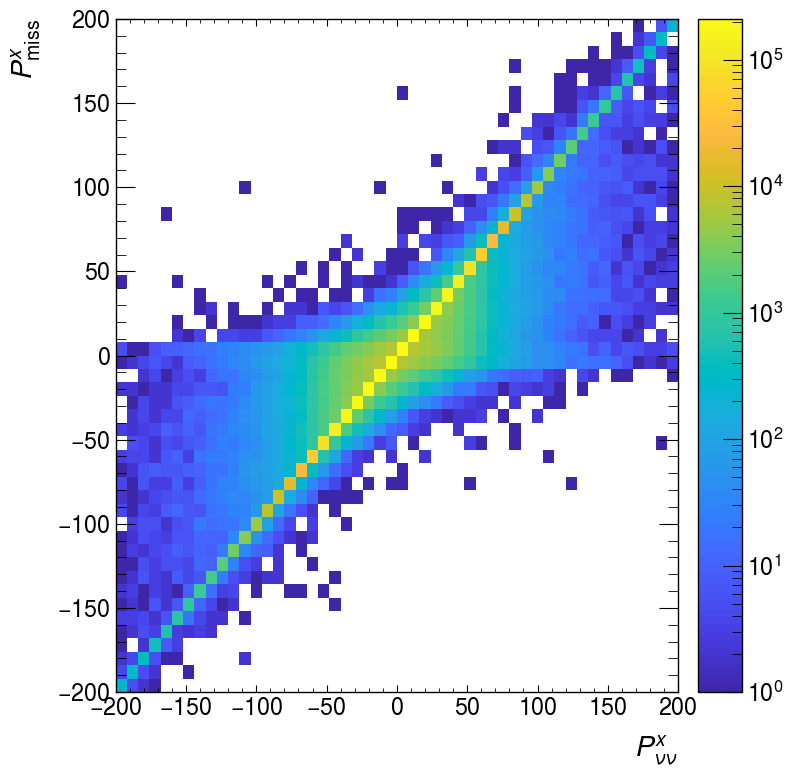

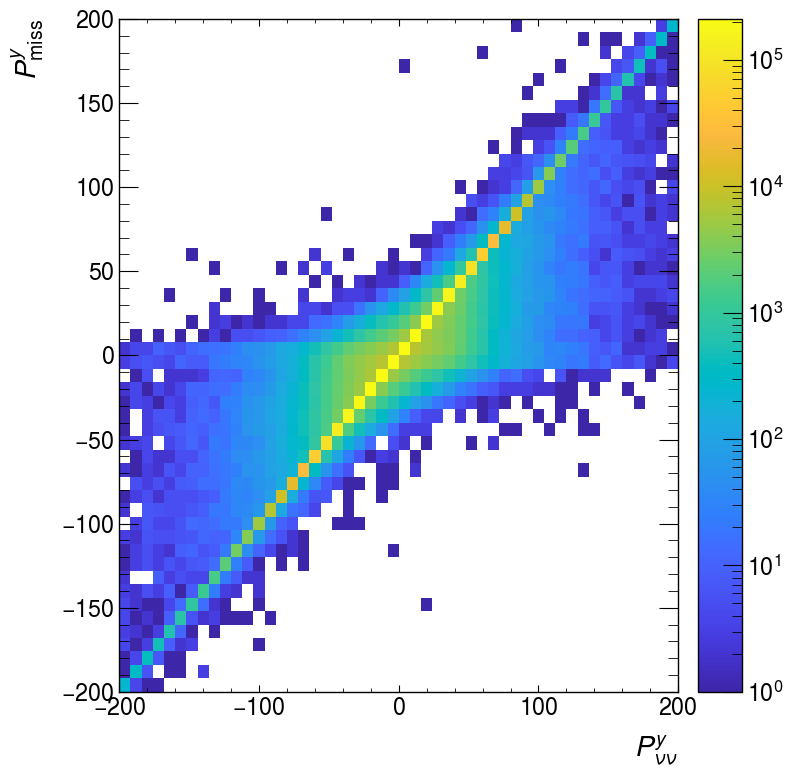

In [137]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
plot_z, plot_x, plot_y = np.histogram2d(MET['px'],LeadingNu['px']+SubleadNu['px'],bins=[50,50],range=[[-200,200],[-200,200]])
hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
hep.box_aspect(ax=ax,aspect=1)
ax.set_xlabel(r'$P^x_{\nu\nu}$')
ax.set_ylabel(r'$P^x_\mathrm{miss}$')
plt.show()

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
plot_z, plot_x, plot_y = np.histogram2d(MET['py'],LeadingNu['py']+SubleadNu['py'],bins=[50,50],range=[[-200,200],[-200,200]])
hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
hep.box_aspect(ax=ax,aspect=1)
ax.set_xlabel(r'$P^y_{\nu\nu}$')
ax.set_ylabel(r'$P^y_\mathrm{miss}$')
plt.show()


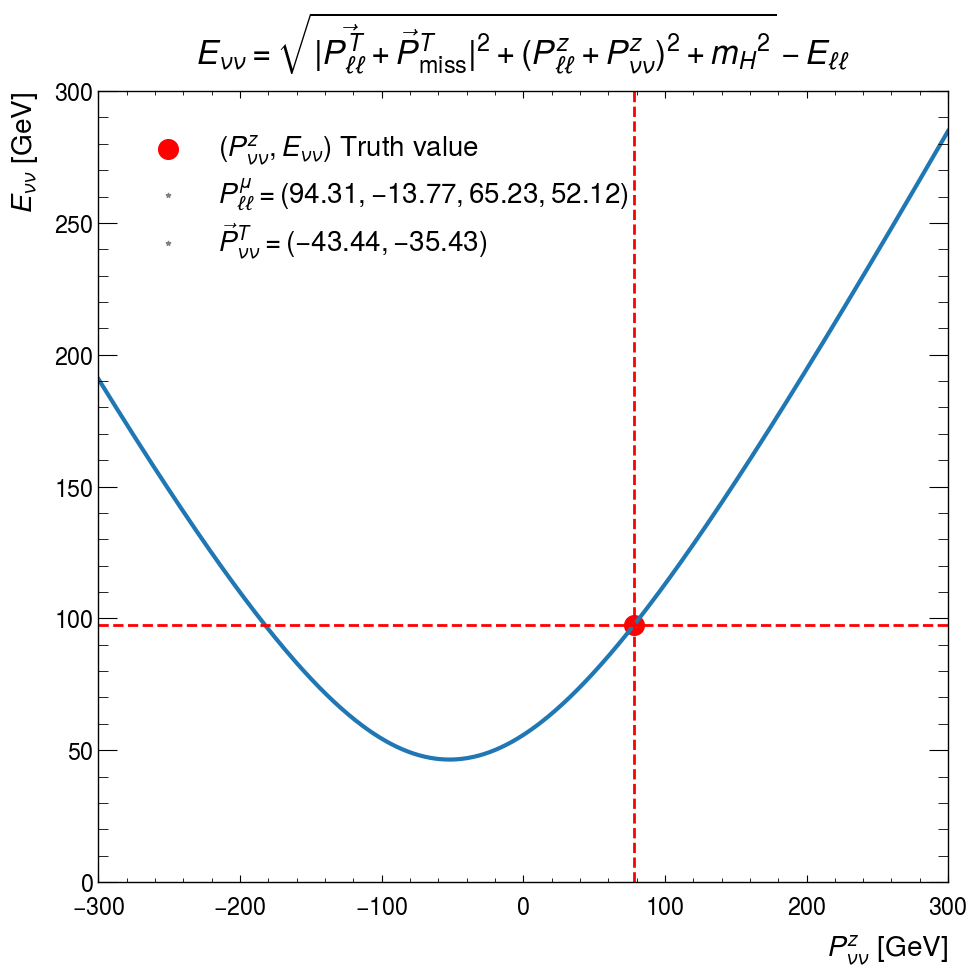

In [27]:
#evt_id =  np.random.choice(len(LeptonM['E']),1,replace=False)[0]
Higgs_mass = 125.11
def diNu_E(Z,diLep_E,diLep_px,diLep_py,diLep_pz,MET_px,MET_py,mH):
    F = (diLep_px + MET_px)**2 + (diLep_py + MET_py)**2 + (diLep_pz + Z)**2 + Higgs_mass**2
    return (np.sqrt(F) - diLep_E)
diNu_pz = np.linspace(-300,300,600)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,10),tight_layout=True)
#hep.atlas.label(ax=ax,loc=1,fontsize=20)
ax.plot(diNu_pz,diNu_E(diNu_pz,\
                       diLepton.at[evt_id,'E'],diLepton.at[evt_id,'px'],diLepton.at[evt_id,'py'],diLepton.at[evt_id,'pz'],\
                       MET.at[evt_id,'px'],MET.at[evt_id,'py'],Higgs_mass),lw=3)
ax.scatter(diNeutrino.at[evt_id,'pz'],diNeutrino.at[evt_id,'E'],s=200,c='r',label=r'$(P^z_{\nu\nu},E_{\nu\nu})$ Truth value')
ax.axvline(diNeutrino.at[evt_id,'pz'],ls='dashed',lw=2,c='r')
ax.axhline(diNeutrino.at[evt_id,'E'],ls='dashed',lw=2,c='r')
ax.scatter(diNeutrino.at[evt_id,'pz'],diNeutrino.at[evt_id,'E'],marker='*',s=10,c='grey',\
           label=r'$P^\mu_{\ell\ell}=({%.2f},{%.2f},{%.2f},{%.2f})$'%(diLepton.at[evt_id,'E'],diLepton.at[evt_id,'px'],diLepton.at[evt_id,'py'],diLepton.at[evt_id,'pz']))
ax.scatter(diNeutrino.at[evt_id,'pz'],diNeutrino.at[evt_id,'E'],marker='*',s=10,c='grey',\
           label=r'$\vec{P}^T_{\nu\nu}=({%.2f},{%.2f})$'%(MET.at[evt_id,'px'],MET.at[evt_id,'py']))
ax.set_xlabel(r'$P^z_{\nu\nu}$ [GeV]')
ax.set_ylabel(r'$E_{\nu\nu}$ [GeV]')
ax.tick_params(axis='x',pad=10)
plt.legend(loc=2,prop={'size':20})
ax.set_title(r'$E_{\nu\nu} = \sqrt{\vert\vec{P^T_{\ell\ell}} + \vec{P}^T_\mathrm{miss}\vert^2 +(P^z_{\ell\ell}+P^z_{\nu\nu})^2 + {m_H}^2} - E_{\ell\ell}$',pad=20,fontsize=24)
plt.show()

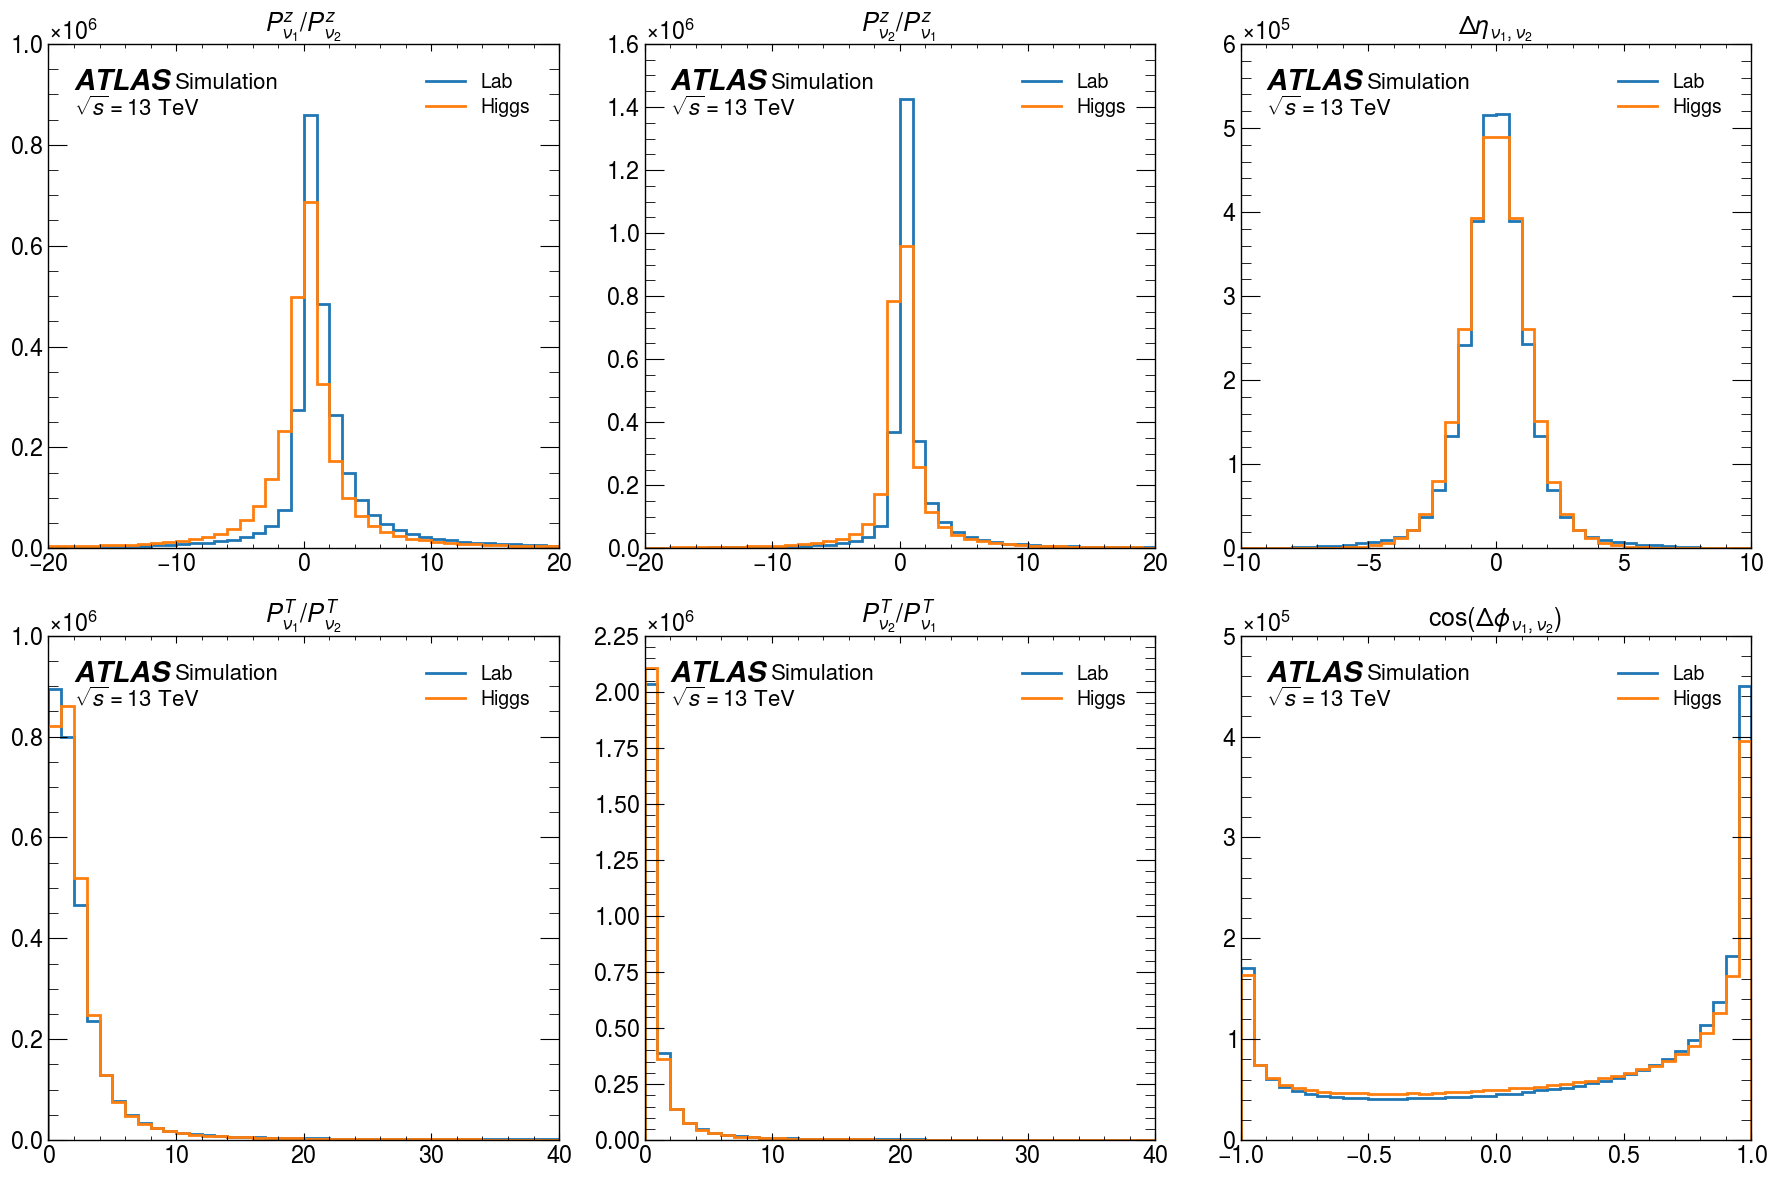

In [124]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(18,12),tight_layout=True)
ax = ax.flatten()
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
plot_titles = [r'$P^z_{\nu_1}/P^z_{\nu_2} $ ',\
               r'$P^z_{\nu_2}/P^z_{\nu_1} $ ',\
               r'$\Delta\eta_{\nu_1,\nu_2}$ ',\
               r'$P^T_{\nu_1}/P^T_{\nu_2} $ ',\
               r'$P^T_{\nu_2}/P^T_{\nu_1} $ ',\
               r'$\cos(\Delta\phi_{\nu_1,\nu_2})$ '
              ]
Pz_12   = LeadingNu['pz'   ] / SubleadNu['pz'   ]
Pz_21   = SubleadNu['pz'   ] / LeadingNu['pz'   ]
Pz_12_H = LeadingNu['pz_H' ] / SubleadNu['pz_H' ]
Pz_21_H = SubleadNu['pz_H' ] / LeadingNu['pz_H' ]
pz_bins = [-20,20]
d_eta   = LeadingNu['eta'  ] - SubleadNu['eta'  ]
d_eta_H = LeadingNu['eta_H'] - SubleadNu['eta_H']
Pt_12   = LeadingNu['pt'   ] / SubleadNu['pt'   ]
Pt_21   = SubleadNu['pt'   ] / LeadingNu['pt'   ]
Pt_12_H = LeadingNu['pt_H' ] / SubleadNu['pt_H' ]
Pt_21_H = SubleadNu['pt_H' ] / LeadingNu['pt_H' ]
d_phi   = LeadingNu['phi'  ] - SubleadNu['phi'  ]
d_phi_H = LeadingNu['phi_H'] - SubleadNu['phi_H']
pt_bins = [0,40]
hist_12  ,bins_12 = np.histogram(Pz_12  ,range=pz_bins,bins=40)
hist_12_H,bins_12 = np.histogram(Pz_12_H,range=pz_bins,bins=40)
hist_21  ,bins_21 = np.histogram(Pz_21  ,range=pz_bins,bins=40)
hist_21_H,bins_21 = np.histogram(Pz_21_H,range=pz_bins,bins=40)
bar_eta  ,bin_eta = np.histogram(d_eta  ,range=[-10,10],bins=40)
bar_eta_H,bin_eta = np.histogram(d_eta_H,range=[-10,10],bins=40)
hep.histplot(hist_12  ,bins_12,ax=ax[0],lw=2,label=r'Lab')
hep.histplot(hist_12_H,bins_12,ax=ax[0],lw=2,label=r'Higgs')
hep.histplot(hist_21  ,bins_21,ax=ax[1],lw=2,label=r'Lab')
hep.histplot(hist_21_H,bins_21,ax=ax[1],lw=2,label=r'Higgs')
hep.histplot(bar_eta  ,bin_eta,ax=ax[2],lw=2,label=r'Lab')
hep.histplot(bar_eta_H,bin_eta,ax=ax[2],lw=2,label=r'Higgs')
hist_12  ,bins_12 = np.histogram(Pt_12  ,range=pt_bins,bins=40)
hist_12_H,bins_12 = np.histogram(Pt_12_H,range=pt_bins,bins=40)
hist_21  ,bins_21 = np.histogram(Pt_21  ,range=pt_bins,bins=40)
hist_21_H,bins_21 = np.histogram(Pt_21_H,range=pt_bins,bins=40)
bar_phi  ,bin_phi = np.histogram(np.cos(d_phi)  ,range=[-1,1],bins=40)
bar_phi_H,bin_phi = np.histogram(np.cos(d_phi_H),range=[-1,1],bins=40)
hep.histplot(hist_12  ,bins_12,ax=ax[3],lw=2,label=r'Lab')
hep.histplot(hist_12_H,bins_12,ax=ax[3],lw=2,label=r'Higgs')
hep.histplot(hist_21  ,bins_21,ax=ax[4],lw=2,label=r'Lab')
hep.histplot(hist_21_H,bins_21,ax=ax[4],lw=2,label=r'Higgs')
hep.histplot(bar_phi  ,bin_phi,ax=ax[5],lw=2,label=r'Lab')
hep.histplot(bar_phi_H,bin_phi,ax=ax[5],lw=2,label=r'Higgs')
for j,i in enumerate (ax) :
    i.set_title(plot_titles[j],fontsize=18)
    hep.atlas.label(ax=i,loc=4,fontsize=16)
    i.legend()

In [101]:
importlib.reload(my_cmaps)

<module 'my_cmaps' from '/home/siangyuan/HEPexp/BellStudy/code/my_cmaps.py'>

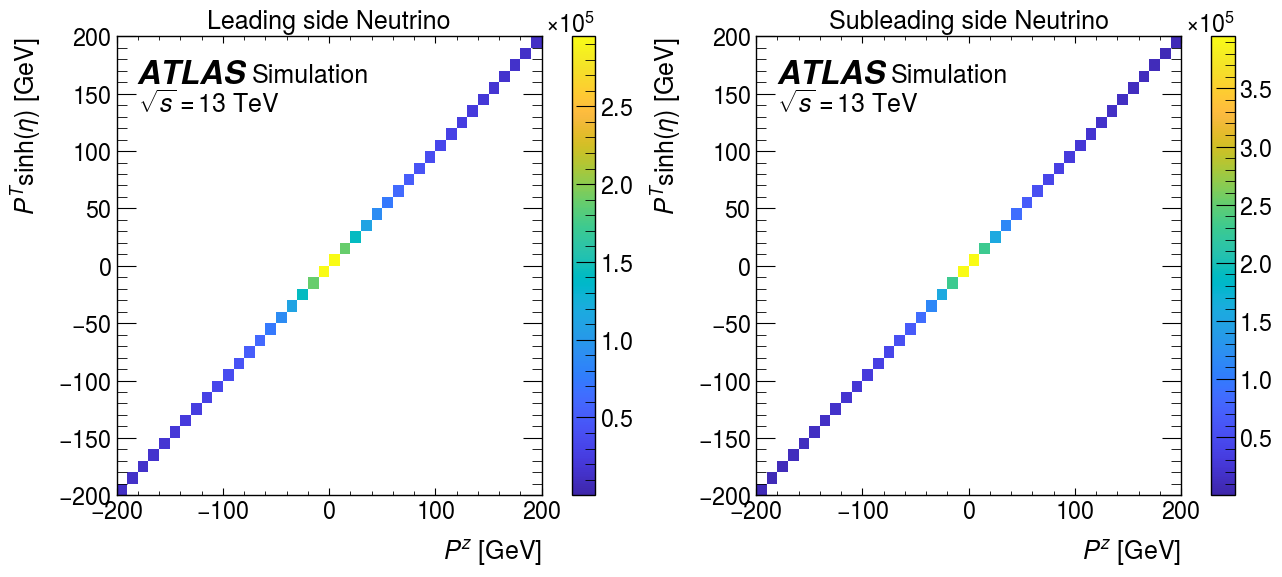

In [103]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(13,6),tight_layout=True)
ax = ax.flatten()
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
grid_range = [[-200,200],[-200,200]]
ax[0].set_title("Leading side Neutrino",fontsize=18)
pz,x_bin,y_bin = np.histogram2d(LeadingNu['pz'],LeadingNu['pt']*np.sinh(LeadingNu['eta']),bins=[40,40],range=grid_range)
hep.hist2dplot(pz,x_bin,y_bin,cmin=10,ax=ax[0],cmap=my_cmaps.parula(),cbarsize='5%',cbarpad=0.3,flow=None)
ax[1].set_title("Subleading side Neutrino",fontsize=18)
pz,x_bin,y_bin = np.histogram2d(SubleadNu['pz'],SubleadNu['pt']*np.sinh(SubleadNu['eta']),bins=[40,40],range=grid_range)
hep.hist2dplot(pz,x_bin,y_bin,cmin=10,ax=ax[1],cmap=my_cmaps.parula(''),cbarsize='5%',cbarpad=0.3,flow=None)
for i in ax :
    hep.box_aspect(ax=i,aspect=1)
    hep.atlas.label(ax=i,loc=4,fontsize=18)
    i.set_xlabel(r'$P^z$ [GeV]',fontsize=18)
    i.set_ylabel(r'$P^T \sinh(\eta)$ [GeV]',fontsize=18)

# Semi-leptonic weighting method

## On the leptonic side:
$$
\begin{align*}\\
&{m_{W_\ell}}^2 = {m_{\ell}}^2 + {m_{\nu}}^2 + 2 g_{\alpha\beta} P^\alpha_{\ell} P^\beta_{\nu} \\
\Rightarrow&{m_{W_\ell}}^2 = {m_{\ell}}^2 + 2 E_\ell P^T_\nu \cosh(\eta) - 2 P^x_\ell P^x_\nu - 2 P^y_\ell P^y_\nu - 2 P^z_\ell P^T_\nu \sinh(\eta) \\
\Rightarrow& \underbrace{\frac{1}{2}\left[ {m_{W_\ell}}^2 - {m_{\ell}}^2\right]}_{A} + P^x_\ell P^x_\nu + P^y_\ell P^y_\nu = \underbrace{\left[E_\ell \cosh(\eta) - P^z_\ell \sinh(\eta) \right]}_{B} P^T_\nu 
\end{align*}
$$

In [23]:
importlib.reload(mv)

<module 'my_vectors' from '/home/siangyuan/HEPexp/BellStudy/code/my_vectors.py'>

In [24]:
evt_id = np.random.choice(len(Higgs['E']))
print(evt_id)
eta =  SubleadNu.at[evt_id,'eta']
MW  =   SubleadW.at[evt_id,  'm']
ML  = SubleadLep.at[evt_id,  'm']
MH  =      Higgs.at[evt_id,  'm']

print([SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz'],  SubleadW.at[evt_id,'E']])
WL  = mv.LorentzVector(  SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz'],  SubleadW.at[evt_id,'E'])
print(WL.components())

print([SubleadLep.at[evt_id,'px'],  SubleadLep.at[evt_id,'py'],  SubleadLep.at[evt_id,'pz'],  SubleadLep.at[evt_id,'E']])
LL  = mv.LorentzVector(SubleadLep.at[evt_id,'px'],SubleadLep.at[evt_id,'py'],SubleadLep.at[evt_id,'pz'],SubleadLep.at[evt_id,'E'])
print(LL.components())

print([SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz'], SubleadNu.at[evt_id,'E']])
VL  = mv.LorentzVector( SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz'], SubleadNu.at[evt_id,'E'])
print(VL.components())

print([LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz'],  LeadingW.at[evt_id,'E']])
WH  = mv.LorentzVector(  LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz'],  LeadingW.at[evt_id,'E'])
print(WH.components())
cosh_eta = np.cosh(eta)
sinh_eta = np.sinh(eta)
PT = np.sqrt(VL.Px()**2 + VL.Py()**2)
A = 0.5*(MW**2 - ML**2) 
B = LL.E()*cosh_eta - LL.Pz()*sinh_eta
print(MW)
print(A + LL.Px()*VL.Px() + LL.Py()*VL.Py())
print(B*PT)

1040661
[30.874722656000003, 31.527248047, -24.736462891, 54.519722656]
[30.874722656000003, 31.527248047, -24.736462891, 54.519722656]
[15.496878906000001, 22.767580077999998, -4.966183105, 27.985333984]
[15.496878906000001, 22.767580077999998, -4.966183105, 27.985333984]
[15.377844727, 8.759667969, -19.77028125, 26.534390625]
[15.377844727, 8.759667969, -19.77028125, 26.534390625]
[5.329223145, -14.803898438000001, -28.199775391, 86.966734375]
[5.329223145, -14.803898438000001, -28.199775391, 86.966734375]
20.329580078
644.3909524538356
644.3909193091644


## Higgs invariant mass:
$$
\begin{align*}
&{m_H}^2 = {m_{W_H}}^2 + {m_{W_\ell}}^2 + 2 g_{\alpha\beta} P^\alpha_{W_H} P^\beta_{W_\ell} \\
\Rightarrow & {m_H}^2 = {m_{W_H}}^2 + {m_{W_\ell}}^2 + 2 g_{\alpha\beta} P^\alpha_{W_H} (P^\beta_{\ell} + P^\beta_{\nu}) \\
\Rightarrow & \underbrace{\frac{1}{2}\left[{m_H}^2 - {m_{W_H}}^2 - {m_{W_\ell}}^2 \right] - g_{\alpha\beta} P^\alpha_{W_H} P^\beta_{\ell}}_C 
+P^x_{W_H}P^x_\nu + P^y_{W_H}P^y_\nu = \underbrace{\left[E_{W_H} \cosh(\eta) - P^z_{W_H} \sinh(\eta)\right]}_D P^T_{\nu} \\
\Rightarrow & \underbrace{\frac{1}{2}\left[{m_H}^2 - {m_{W_H}}^2 - {m_{W_\ell}}^2 \right] 
-E_{W_H} E_{\ell} + P^x_{W_H} P^x_{\ell} + P^y_{W_H} P^y_{\ell} + P^z_{W_H} P^z_{\ell} }_C 
+P^x_{W_H}P^x_\nu + P^y_{W_H}P^y_\nu = \underbrace{\left[E_{W_H} \cosh(\eta) - P^z_{W_H} \sinh(\eta)\right]}_D P^T_{\nu} \\
\end{align*}
$$

In [ ]:
C = 0.5*(MH**2 - WH.M2() - MW**2) - WH.Dot(LL)
print(C + WH.Px()*VL.Px() + WH.Py()*VL.Py())
D = WH.E()*cosh_eta - WH.Pz()*sinh_eta
print(D*PT)

## System of equations

### $P^T_\nu$ terms
$$
\begin{alignat}{3}
A &+ P^x_\ell  P^x_\nu &&+ P^y_\ell  P^y_\nu &= B P^T_\nu \\
C &+ P^x_{W_H} P^x_\nu &&+ P^y_{W_H} P^y_\nu &= D P^T_\nu
\end{alignat}
$$

$$
\begin{alignat*}{3}
P^x_{W_H}  A &+ P^x_{W_H}  P^x_{\ell} P^x_{\nu} &+ P^x_{W_H}  P^y_{\ell} P^y_{\nu} &= P^x_{W_H}  B P^T_{\nu}\\
P^x_{\ell} C &+ P^x_{\ell} P^x_{W_H}  P^x_{\nu} &+ P^x_{\ell} P^y_{W_H}  P^y_{\nu} &= P^x_{\ell} D P^T_{\nu} \\
\end{alignat*}
$$

$$
(P^x_{W_H} A - P^x_\ell C) + (P^x_{W_H} P^y_{\ell} - P^x_\ell P^y_{W_H}) P^y_\nu = (P^x_{W_H} B - P^x_\ell D) P^T_{\nu} 
$$

$$
\boxed{
 \underbrace{ {(P^x_{W_H} A - P^x_\ell C) \over (P^x_{W_H} B - P^x_\ell D)} }_{F}
+\underbrace{ {(P^x_{W_H} P^y_{\ell} - P^x_\ell P^y_{W_H}) \over (P^x_{W_H} B - P^x_\ell D) } }_{G} P^y_\nu
=  P^T_{\nu} 
}
$$


In [26]:
print(A + LL.Px()*VL.Px() + LL.Py()*VL.Py())
print(B*PT)
print(C + WH.Px()*VL.Px() + WH.Py()*VL.Py())
print(D*PT)
F = (       A*WH.Px() -       C*LL.Px() )/( B*WH.Px() - D*LL.Px() )
G = ( LL.Py()*WH.Px() - WH.Py()*LL.Px() )/( B*WH.Px() - D*LL.Px() )
print(F + G*VL.Py())
print(PT)

644.3909524538356
644.3909193091644
1750.0922546990623
1750.0917579956856
17.697742518944366
17.697736899808582


### $P^y_\nu$ terms 

$$
\begin{alignat}{3}
A &+ P^x_\ell  P^x_\nu &&+ P^y_\ell  P^y_\nu &= B P^T_\nu \\
C &+ P^x_{W_H} P^x_\nu &&+ P^y_{W_H} P^y_\nu &= D P^T_\nu
\end{alignat}
$$

$$
\begin{alignat*}{3}
(AD - CB) &+ (P^x_\ell D - P^x_{W_H} B) &&P^x_\nu                          &+ (P^y_\ell D - P^y_{W_H}B) P^y_\nu = 0 \\
(AD - CB) &+ (P^x_\ell D - P^x_{W_H} B) &&\sqrt{(P^T_\nu)^2 - (P^y_\nu)^2} &+ (P^y_\ell D - P^y_{W_H}B) P^y_\nu = 0 \\
\end{alignat*}
$$

$$
\begin{align*}
            &(AD - CB)^2 + (P^y_\ell D - P^y_{W_H} B)^2 (P^y_\nu)^2 + 2(AD - CB)(P^y_\ell D- P^y_{W_H} B)P^y_\nu = (P^x_\ell D - P^x_{W_H} B)^2[(P^T_\nu)^2 - (P^y_\nu)^2]\\
\Rightarrow &(AD - CB)^2 + \left[(P^y_\ell D - P^y_{W_H} B)^2 + (P^x_\ell D - P^x_{W_H} B)^2 \right](P^y_\nu)^2 + 2(AD - CB)(P^y_\ell D - P^y_{W_H} B)P^y_\nu = (P^x_\ell D - P^x_{W_H} B)^2 (P^T_\nu)^2 \\
& =(P^x_\ell D - P^x_{W_H} B)^2 [ F^2 + 2FG P^y_\nu + G^2 (P^y_\nu)^2 ]
\end{align*}
$$

In [27]:
print( (A*D-C*B) + ( LL.Px()*D - WH.Px()*B )*VL.Px()                     + ( LL.Py()*D - WH.Py()*B )*VL.Py() )
print( (A*D-C*B) + ( LL.Px()*D - WH.Px()*B )*np.sqrt(PT**2 - VL.Py()**2) + ( LL.Py()*D - WH.Py()*B )*VL.Py() )
L0 = ( (A*D-C*B)**2 )
L2 = ( ( (LL.Py()*D)**2 - 2*(LL.Py()*D)*(WH.Py()*B) + (WH.Py()*B)**2 )*(VL.Py()**2) )
L1 = ( 2*(A*D-C*B)*( LL.Py()*D - WH.Py()*B )*VL.Py() )
R  = ( ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*(VL.Px()**2) ) 
print(L0 + L1 + L2)
print(R)
R  = ( ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*(PT**2) ) 
L2 = ( L2 + ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*(VL.Py()**2) )
print(L0 + L1 + L2)
print(R)
R =  ( (LL.Px()*D)**2 - 2*(LL.Px()*D)*(WH.Px()*B) + (WH.Px()*B)**2 )*( F**2 + 2*F*G*VL.Py() + (G*VL.Py())**2 )
print(R)

-0.014807821538852295
-0.014807821538852295
423614655.7511095
423614046.2050898
561067806.284389
561067196.7383693
561067553.0227101


## Quadratic equation
$$
\begin{alignat*}{4}
& \:  && \left[ (AD - BC)^2 - (P^x_\ell D - P^x_{W_H} B)^2 F^2 \right] & \: &&\\
& +2  && \left[ (AD - BC)(P^y_\ell D - P^y_{W_H} B) - (P^x_\ell D - P^x_{W_H} B)^2 FG \right]  & ( P^y_\nu)\:\:&& \\
& +\:&& \left[ (P^y_\ell D - P^y_{W_H} B)^2 + (P^x_\ell D - P^x_{W_H} B)^2 -(P^x_\ell D - P^x_{W_H} B )^2 G^2 \right] & ( P^y_\nu )^2 &&
\end{alignat*}
$$

# Weighting Code

In [33]:
L0 = ( (A*D-C*B)**2 - (( LL.Px()*D - WH.Px()*B )*F)**2 ) 
L1 = ( 2*(A*D-C*B)*( LL.Py()*D - WH.Py()*B ) - 2*F*G*( LL.Px()*D - WH.Px()*B )**2 )
L2 = ( ( LL.Py()*D - WH.Py()*B )**2 +  (1 - G**2)*( LL.Px()*D - WH.Px()*B )**2)
print(L2*VL.Py()*VL.Py() + L1*VL.Py() + L0)

253.26167917251587


In [82]:
#x_std = np.std(SubleadNu['px'])
#y_std = np.std(SubleadNu['py'])
x_std = 1
y_std = 1
def weight_eq(X_est,X_tar,Y_est,Y_tar):
    DX = (X_est-X_tar)/x_std
    DY = (Y_est-Y_tar)/y_std
    return np.exp(-0.5*DX*DX)*np.exp(-0.5*DY*DY)
    
def solve_quad(K2,K1,K0,tolerance):
    #'''
    x = np.linspace(-20,20,100)
    y = x*x*K2 + x*K1 + K0
    plt.plot(x,y)
    plt.axhline(0,color='grey',ls='dashed')
    #'''
    det = K1*K1 - 4*K0*K3
    K0_prime = K0 - (tolerance*np.abs(K2)/K2)
    det_prime = K1*K1 - 4*K0_prime*K2
    if det >= 0 : 
        Y1 = (-1*K1 + np.sqrt(det))/(2*K2) 
        Y2 = (-1*K1 - np.sqrt(det))/(2*K2) 
        plt.axvline(Y1,color='r',ls='dotted')
        plt.axvline(Y2,color='r',ls='dotted')
        return Y1,Y2
    elif  det_prime >= 0 :
        Y1 = (-1*K1 + np.sqrt(det_prime))/(2*K2) 
        Y2 = (-1*K1 + np.sqrt(det_prime))/(2*K2) 
        plt.axvline(Y1,color='r',ls='dotted')
        plt.axvline(Y2,color='r',ls='dotted')
        return Y1,Y2
    else:
        raise Exception("Negative determinant")

(15.831754103965476, 8.759671756569068)
8.759667969


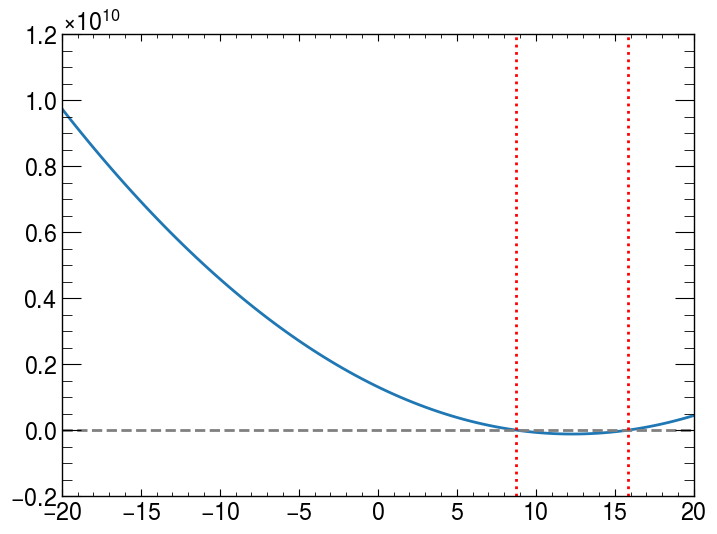

In [75]:
print(solve_quad(L2,L1,L0,100))
print(VL.Py())

In [188]:
%%time
f1 = np.load("weighting_100K_1.npz")
f2 = np.load("weighting_100K_2.npz")
print( max(f1['evt_id']) )
print( max(f2['evt_id']) )
sample1_id = np.zeros(1100000)
sample2_id = np.zeros(1100000)
for i in range( len(f1['evt_id']) ):
    sample1_id[ f1['evt_id'][i] ] = 1
    sample2_id[ f2['evt_id'][i] ] = 1

1087317
1087310
CPU times: user 9min 5s, sys: 5.62 s, total: 9min 10s
Wall time: 9min 10s


In [189]:
print(f1.files)
print(f2.files)

['cuts', 'evt_id', 'w_mass_truth', 'w_mass_est', 'nu_eta_truth', 'nu_eta_est']
['cuts', 'evt_id', 'w_mass_truth', 'w_mass_est', 'nu_eta_truth', 'nu_eta_est']


In [191]:
%%time
id_match = (sample1_id+sample2_id)
print(np.unique(id_match, return_counts=True))
comb_event = []
comb_mw_est = []
comb_mw_truth = []
comb_eta_est = []
comb_eta_truth = []
for i in range(len(f1['evt_id'])):
    # if the ith element is duplicate, sequence array[i] == 2
    # if the ith element is unique, sequence array [i] == 1
    # if sequence array element == 0, this event does not exist in either sample
    if id_match[ f1['evt_id'][i] ] == 1: # if the ith element in the index array 1 is not duplicate
        comb_event.append(    f1['evt_id'      ][i])
        comb_mw_est.append(   f1['w_mass_est'  ][i])
        comb_mw_truth.append( f1['w_mass_truth'][i])
        comb_eta_est.append(  f1['nu_eta_est'  ][i])
        comb_eta_truth.append(f1['nu_eta_truth'][i])
    if id_match[ f2['evt_id'][i] ] == 1: # if the ith element in the index array 2 is not duplicate
        comb_event.append(    f2['evt_id'      ][i])
        comb_mw_est.append(   f2['w_mass_est'  ][i])
        comb_mw_truth.append( f2['w_mass_truth'][i])
        comb_eta_est.append(  f2['nu_eta_est'  ][i])
        comb_eta_truth.append(f2['nu_eta_truth'][i])
    

(array([0., 1., 2.]), array([909208, 181584,   9208]))
CPU times: user 53min 34s, sys: 1min, total: 54min 35s
Wall time: 54min 35s


In [196]:
comb_event     = np.array(comb_event)
comb_mw_est    = np.array(comb_mw_est)
comb_mw_truth  = np.array(comb_mw_truth)
comb_eta_est   = np.array(comb_eta_est)
comb_eta_truth = np.array(comb_eta_truth)

/tmp/ipykernel_4606/2428648146.py:15: RuntimeWarning: divide by zero encountered in divide
  ax[1].vlines(truth_bin[0:-1]+(1/2),1,(pred_bar)/truth_bar,color='k',lw=1)
/tmp/ipykernel_4606/2428648146.py:16: RuntimeWarning: divide by zero encountered in divide
  ax[1].scatter(truth_bin[0:-1]+(1/2),(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')


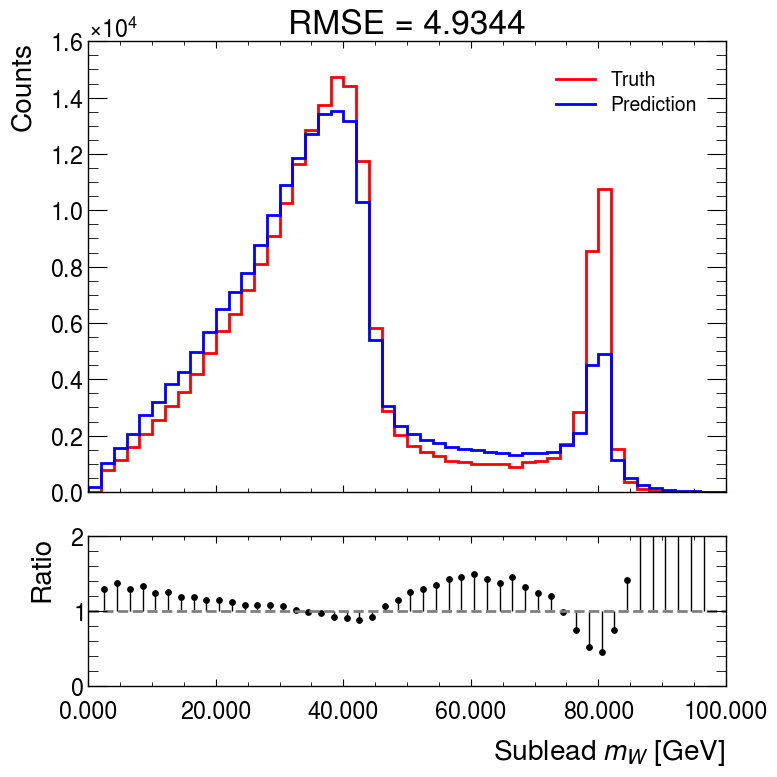

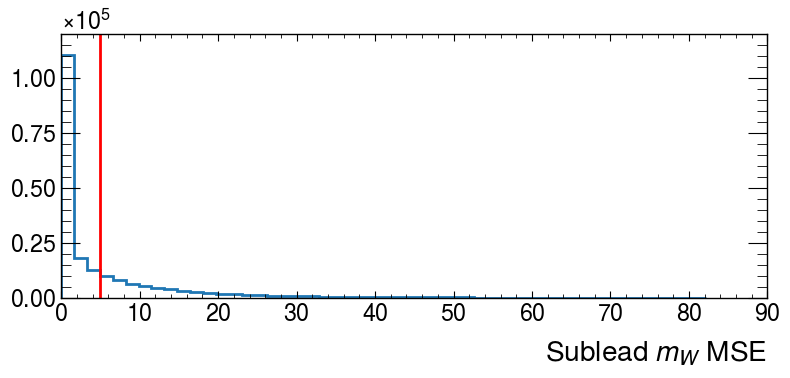

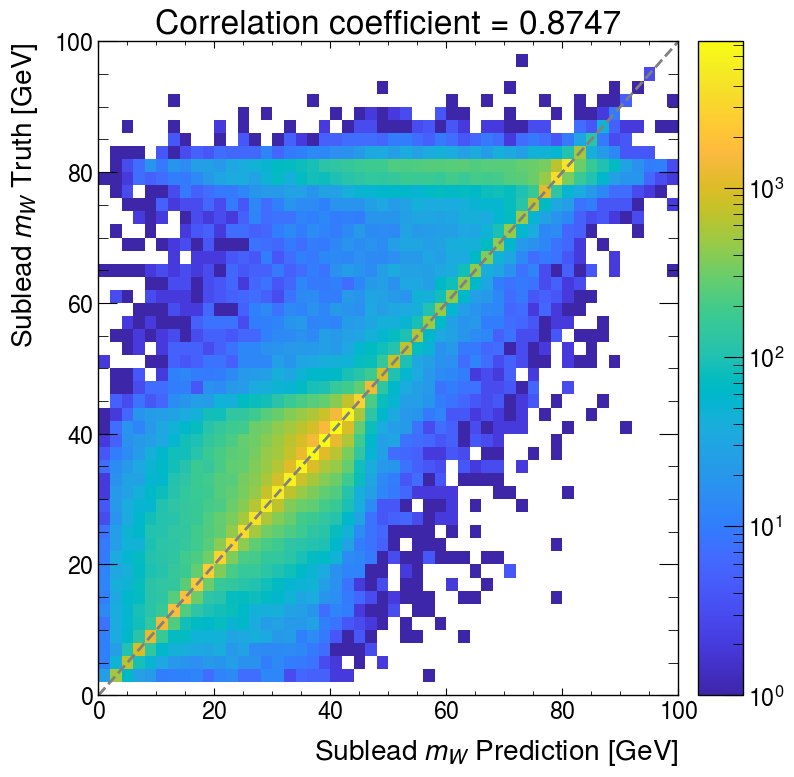

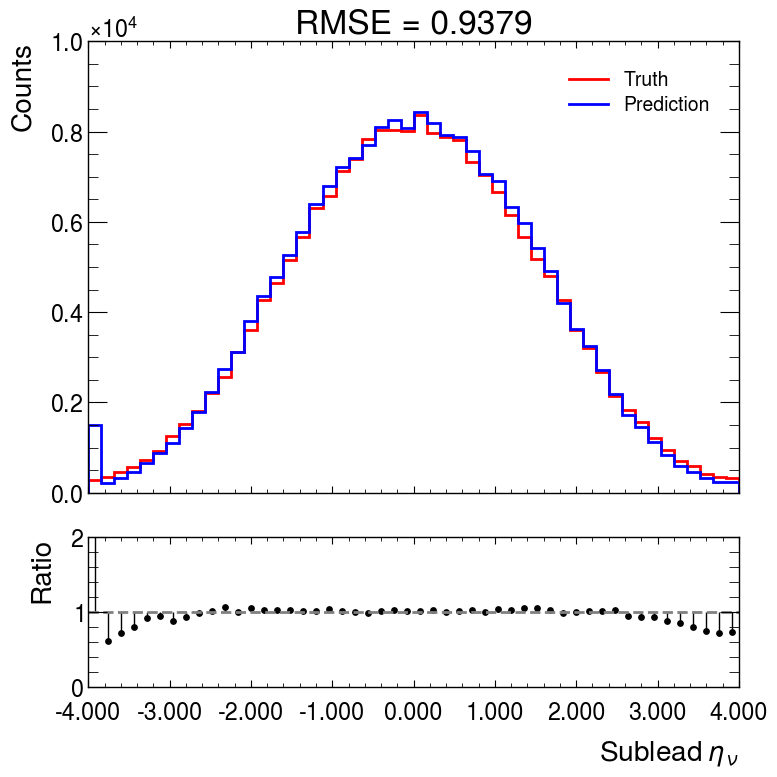

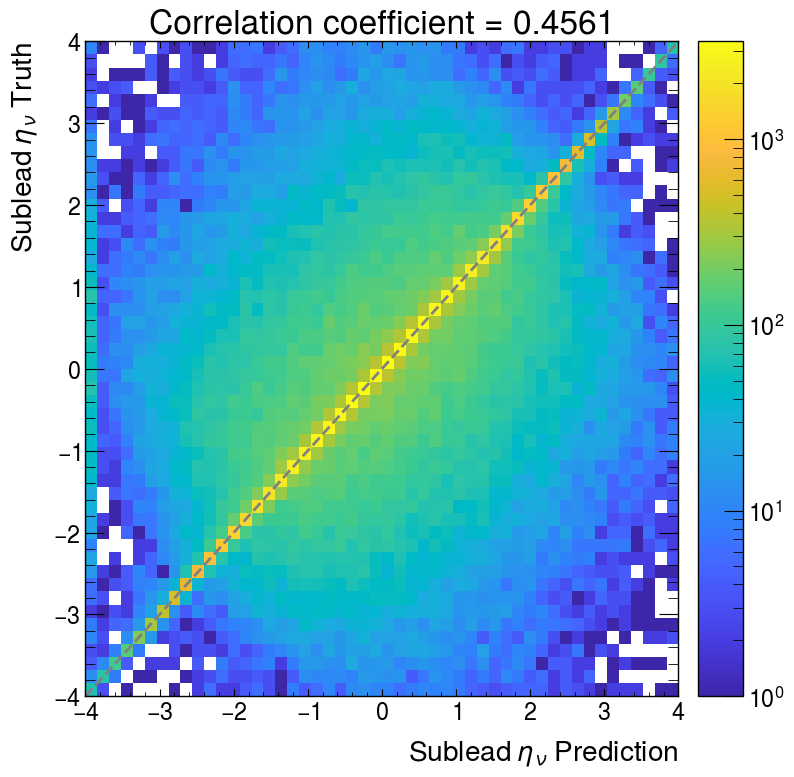

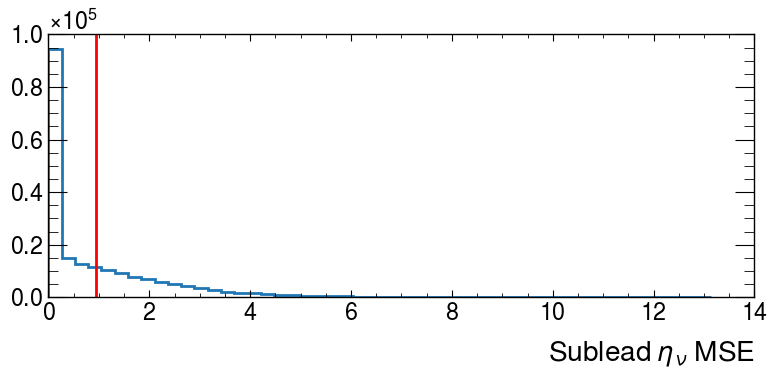

In [152]:
comb_mw_truth  = np.concatenate([comb_sample['wm_truth_1' ][comb_sample['id_1'] == 1],comb_sample['wm_truth_2' ][comb_sample['id_2'] == 1]])
comb_mw_est    = np.concatenate([comb_sample['wm_est_1'   ][comb_sample['id_1'] == 1],comb_sample['wm_est_2'   ][comb_sample['id_2'] == 1]])
comb_eta_truth = np.concatenate([comb_sample['eta_truth_1'][comb_sample['id_1'] == 1],comb_sample['eta_truth_2'][comb_sample['id_2'] == 1]])
comb_eta_est   = np.concatenate([comb_sample['eta_est_1'  ][comb_sample['id_1'] == 1],comb_sample['eta_est_2'  ][comb_sample['id_2'] == 1]])
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [6,2]},sharex=True,tight_layout=True)
ax = ax.flatten()
rmse= np.mean(np.sqrt((comb_mw_est - comb_mw_truth)**2))
truth_bar,truth_bin = np.histogram(comb_mw_truth,bins=50,range=[0,100])
pred_bar,pred_bin   = np.histogram(comb_mw_est,bins=50,range=[0,100])
hep.histplot(truth_bar,truth_bin,ax=ax[0],histtype='step',lw=2,label='Truth',color='r')
hep.histplot(pred_bar,pred_bin,ax=ax[0],histtype='step',lw=2,label='Prediction',color='b')
ax[0].set_title("RMSE = {:.4f}".format(rmse))
ax[0].legend()
ax[0].set_ylabel("Counts")
ax[1].vlines(truth_bin[0:-1]+(1/2),1,(pred_bar)/truth_bar,color='k',lw=1)
ax[1].scatter(truth_bin[0:-1]+(1/2),(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"Sublead $m_W$ [GeV]")
ax[1].set_ylabel("Ratio")
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax[1].tick_params(axis='x',pad=10)
plt.show()
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(8,4),tight_layout=True)
ax.hist(np.sqrt((comb_mw_est - comb_mw_truth)**2),bins=50,histtype='step',lw=2)#,range=[0,5])
ax.axvline(np.mean(np.sqrt((comb_mw_est - comb_mw_truth)**2)),color='r')
ax.set_xlabel("Sublead $m_W$ MSE")
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
plot_z, plot_x, plot_y = np.histogram2d(comb_mw_est,comb_mw_truth,bins=[50,50],range=[[0,100],[0,100]])
hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
hep.box_aspect(ax=ax,aspect=1) 
ax.set_xlabel(r"Sublead $m_W$ Prediction [GeV]")
ax.set_ylabel(r"Sublead $m_W$ Truth [GeV]")
coef = np.corrcoef(comb_mw_est,comb_mw_truth)[0,1]
ax.axline((-1,-1),(1,1),ls='dashed',color='gray')
ax.set_title("Correlation coefficient = {:.4f}".format(coef))
plt.show()

fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [6,2]},sharex=True,tight_layout=True)
ax = ax.flatten()
rmse= np.mean(np.sqrt((comb_eta_est - comb_eta_truth)**2))
truth_bar,truth_bin = np.histogram(comb_eta_truth,bins=50,range=[-4,4])
pred_bar,pred_bin   = np.histogram(comb_eta_est,bins=50,range=[-4,4])
hep.histplot(truth_bar,truth_bin,ax=ax[0],histtype='step',lw=2,label='Truth',color='r')
hep.histplot(pred_bar,pred_bin,ax=ax[0],histtype='step',lw=2,label='Prediction',color='b')
ax[0].set_title("RMSE = {:.4f}".format(rmse))
ax[0].legend()
ax[0].set_ylabel("Counts")
ax[1].vlines(truth_bin[0:-1]+(8/100),1,(pred_bar)/truth_bar,color='k',lw=1)
ax[1].scatter(truth_bin[0:-1]+(8/100),(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"Sublead $\eta_\nu$")
ax[1].set_ylabel("Ratio")
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax[1].tick_params(axis='x',pad=10)
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
plot_z, plot_x, plot_y = np.histogram2d(comb_eta_est,comb_eta_truth,bins=[50,50],range=[[-4,4],[-4,4]])
hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
hep.box_aspect(ax=ax,aspect=1) 
ax.set_xlabel(r"Sublead $\eta_\nu$ Prediction")
ax.set_ylabel(r"Sublead $\eta_\nu$ Truth")
coef = np.corrcoef(comb_eta_est,comb_eta_truth)[0,1]
ax.axline((-1,-1),(1,1),ls='dashed',color='gray')
ax.set_title("Correlation coefficient = {:.4f}".format(coef))
plt.show()
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(8,4),tight_layout=True)
ax.hist(np.sqrt((comb_eta_est - comb_eta_truth)**2),bins=50,histtype='step',lw=2)#,range=[0,1])
ax.axvline(np.mean(np.sqrt((comb_eta_est - comb_eta_truth)**2)),color='r')
ax.set_xlabel(r"Sublead $\eta_\nu$ MSE")
plt.show()

In [194]:
print(comb_event[i])
print(comb_mw_est[i])
print(comb_mw_truth[i])
print(comb_eta_est[i])
print(comb_eta_truth[i])

761808
38.13813813813814
32.981105469
-0.8048048048048049
0.61517


In [150]:
MH = 125
N_div = 1000
nu_eta_bin = np.linspace(-4,4,N_div)
W_sublead_m_bin = np.linspace(0,100,N_div)
X, Y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)

def weighting_event(evt_id):
    MET_X = MET.at[evt_id,'px'] - LeadingNu.at[evt_id,'px']
    MET_Y = MET.at[evt_id,'py'] - LeadingNu.at[evt_id,'py']
    WL  = np.array([  SubleadW.at[evt_id,'E'],  SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz']])
    LL  = np.array([SubleadLep.at[evt_id,'E'],SubleadLep.at[evt_id,'px'],SubleadLep.at[evt_id,'py'],SubleadLep.at[evt_id,'pz']])
    VL  = np.array([ SubleadNu.at[evt_id,'E'], SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz']])
    WH  = np.array([  LeadingW.at[evt_id,'E'],  LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz']])
    WH_M2 = WH[0]**2 - WH[1]**2 - WH[2]**2 - WH[3]**2
    WH_dot_LL = WH[0]*LL[0] - WH[1]*LL[1] - WH[2]*LL[2] - WH[3]*LL[3]
    MH_truth  =      Higgs.at[evt_id,  'm']
    MW_truth  =   SubleadW.at[evt_id,  'm']
    eta_truth =  SubleadNu.at[evt_id,'eta']
    ML  = SubleadLep.at[evt_id,  'm']
    cosh_eta = np.cosh(Y)
    sinh_eta = np.sinh(Y)
    A = 0.5*(X**2) - ML**2
    B = LL[0]*cosh_eta - LL[3]*sinh_eta
    C = 0.5*(MH**2 - WH_M2 - X**2) - WH_dot_LL
    D = WH[0]*cosh_eta - WH[3]*sinh_eta
    YDB = LL[2]*D - WH[2]*B
    XDB = LL[1]*D - WH[1]*B
    F = (     A*WH[1] -     C*LL[1] )/XDB
    G = ( LL[2]*WH[1] - WH[2]*LL[1] )/XDB
    L0 = ( (A*D-C*B)**2 - ( XDB*F)**2 ) 
    L1 = ( 2*(A*D-C*B)*YDB - 2*F*G*(XDB**2) )
    L2 = ( YDB**2 +  (1 - G**2)*( XDB**2))
    det = L1*L1 - 4*L0*L2
    Y1 = (-1*L1 + np.sqrt(det))/(2*L2) 
    Y2 = (-1*L1 - np.sqrt(det))/(2*L2) 
    X1 = ((A*D-C*B) + YDB*Y1)/(-1*XDB)
    X2 = ((A*D-C*B) + YDB*Y2)/(-1*XDB)
    Z = np.where(np.exp(-0.5*(X1-MET_X)**2)* np.exp(-0.5*(Y1-MET_Y)**2) > np.exp(-0.5*(X2-MET_X)**2)* np.exp(-0.5*(Y2-MET_Y)**2), \
                 np.exp(-0.5*(X1-MET_X)**2)* np.exp(-0.5*(Y1-MET_Y)**2),\
                 np.exp(-0.5*(X2-MET_X)**2)* np.exp(-0.5*(Y2-MET_Y)**2))
    eta_id , mw_id = np.unravel_index(np.nanargmax(Z), Z.shape)  
    return W_sublead_m_bin[mw_id], nu_eta_bin[eta_id]

In [155]:
%%time
N_events = 100000
eta_estimation = np.zeros(N_events)
mw_estimation = np.zeros(N_events)
random_events = np.random.choice(len(Higgs['E']),N_events,replace=False)
eta_truth_val = SubleadNu['eta'][random_events]
mw_truth_val = SubleadW['m'][random_events]
for i,j in enumerate(random_events):
    mw_estimation[i],eta_estimation[i] = weighting_event(j)
    


/tmp/ipykernel_41302/1397906980.py:34: RuntimeWarning: invalid value encountered in sqrt
  Y1 = (-1*L1 + np.sqrt(det))/(2*L2)
/tmp/ipykernel_41302/1397906980.py:35: RuntimeWarning: invalid value encountered in sqrt
  Y2 = (-1*L1 - np.sqrt(det))/(2*L2)
/tmp/ipykernel_41302/1397906980.py:38: RuntimeWarning: invalid value encountered in greater
  Z = np.where(np.exp(-0.5*(X1-MET_X)**2)* np.exp(-0.5*(Y1-MET_Y)**2) > np.exp(-0.5*(X2-MET_X)**2)* np.exp(-0.5*(Y2-MET_Y)**2), \


CPU times: user 1d 14h 18min, sys: 29min 23s, total: 1d 14h 47min 23s
Wall time: 5h 17min 17s


In [157]:
np.savez_compressed("weighting_100K",cuts = all_cuts,
                                     evt_id = random_events,
                                     w_mass_truth = mw_truth_val,
                                     w_mass_est   = mw_estimation,
                                     nu_eta_truth = eta_truth_val,
                                     nu_eta_est   = eta_estimation)

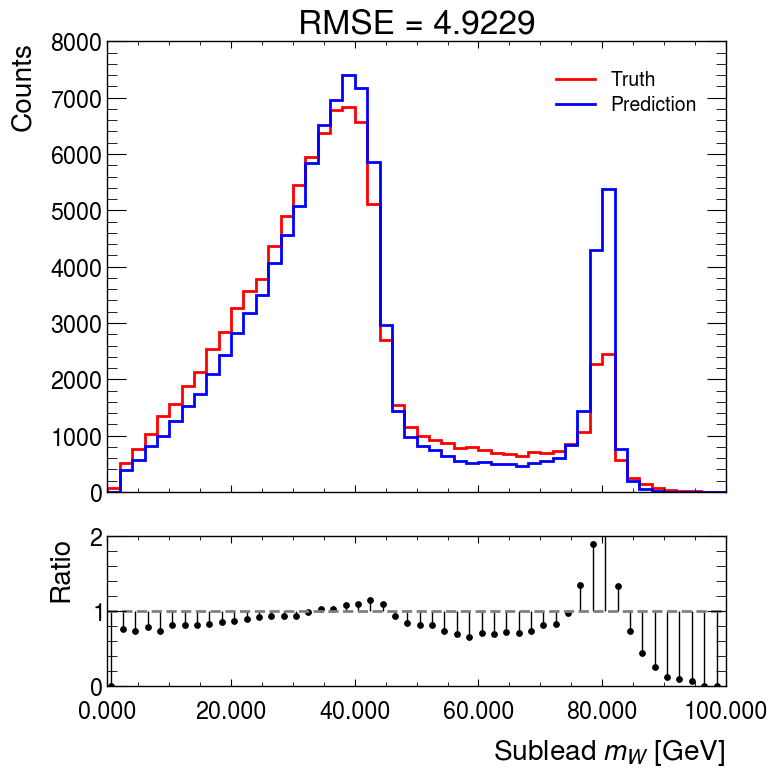

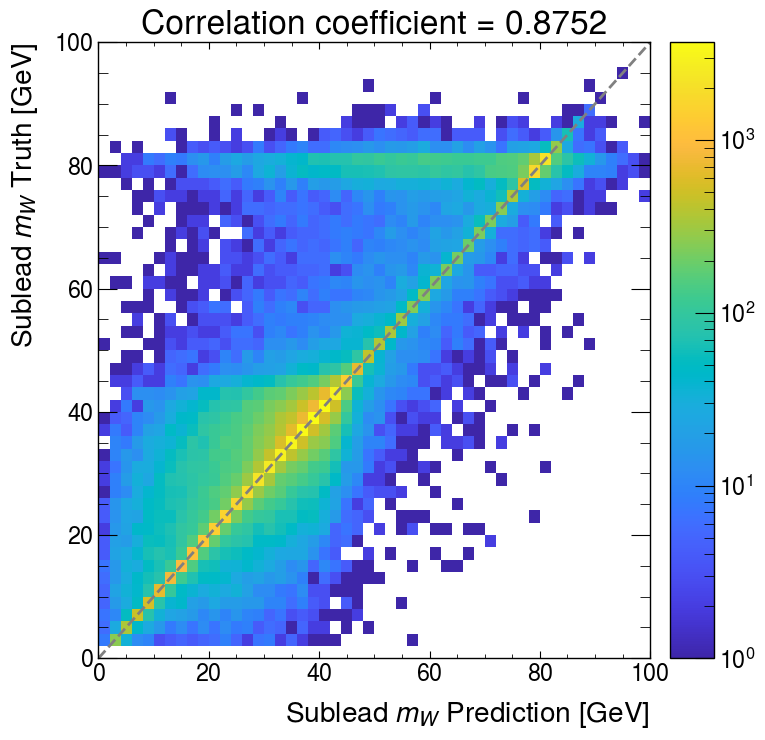

In [174]:
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [6,2]},sharex=True,tight_layout=True)
ax = ax.flatten()
rmse= np.mean(np.sqrt((mw_estimation - mw_truth_val)**2))
truth_bar,truth_bin = np.histogram(mw_estimation,bins=50,range=[0,100])
pred_bar,pred_bin   = np.histogram(mw_truth_val,bins=50,range=[0,100])
hep.histplot(truth_bar,truth_bin,ax=ax[0],histtype='step',lw=2,label='Truth',color='r')
hep.histplot(pred_bar,pred_bin,ax=ax[0],histtype='step',lw=2,label='Prediction',color='b')
ax[0].set_title("RMSE = {:.4f}".format(rmse))
#ax[0].scatter(0.4,0.4,color='w',s=0.01,label=f'RMSE = {rmse:.3f}')
ax[0].legend()
ax[0].set_ylabel("Counts")
ax[1].vlines(truth_bin[0:-1]+(1/2),1,(pred_bar)/truth_bar,color='k',lw=1)#,align='edge')
ax[1].scatter(truth_bin[0:-1]+(1/2),(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"Sublead $m_W$ [GeV]")
#ax[1].set_xlabel(r"(standardized) $\cos(\Delta^\phi_{\nu\nu})$ ")
ax[1].set_ylabel("Ratio")
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax[1].tick_params(axis='x',pad=10)
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
plot_z, plot_x, plot_y = np.histogram2d(mw_estimation,mw_truth_val,bins=[50,50],range=[[0,100],[0,100]])
hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
hep.box_aspect(ax=ax,aspect=1) 
ax.set_xlabel(r"Sublead $m_W$ Prediction [GeV]")
ax.set_ylabel(r"Sublead $m_W$ Truth [GeV]")
coef = np.corrcoef(mw_estimation,mw_truth_val)[0,1]
ax.axline((-1,-1),(1,1),ls='dashed',color='gray')
ax.set_title("Correlation coefficient = {:.4f}".format(coef))
plt.show()

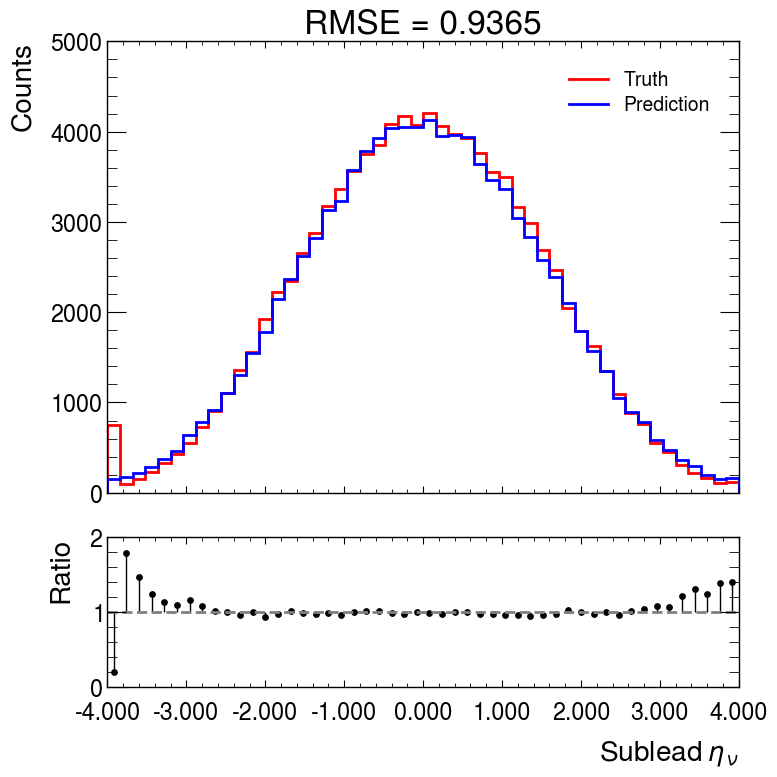

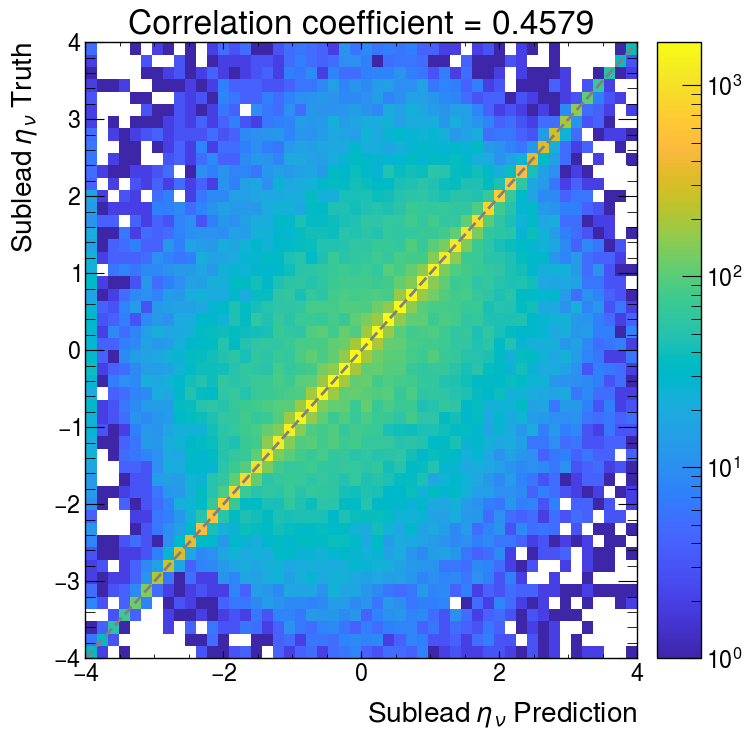

In [175]:
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [6,2]},sharex=True,tight_layout=True)
ax = ax.flatten()
rmse= np.mean(np.sqrt((eta_estimation - eta_truth_val)**2))
truth_bar,truth_bin = np.histogram(eta_estimation,bins=50,range=[-4,4])
pred_bar,pred_bin   = np.histogram(eta_truth_val,bins=50,range=[-4,4])
hep.histplot(truth_bar,truth_bin,ax=ax[0],histtype='step',lw=2,label='Truth',color='r')
hep.histplot(pred_bar,pred_bin,ax=ax[0],histtype='step',lw=2,label='Prediction',color='b')
ax[0].set_title("RMSE = {:.4f}".format(rmse))
#ax[0].scatter(0.4,0.4,color='w',s=a0.01,label=f'RMSE = {rmse:.3f}')
ax[0].legend()
ax[0].set_ylabel("Counts")
ax[1].vlines(truth_bin[0:-1]+(8/100),1,(pred_bar)/truth_bar,color='k',lw=1)#,align='edge')
ax[1].scatter(truth_bin[0:-1]+(8/100),(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"Sublead $\eta_\nu$")
#ax[1].set_xlabel(r"(standardized) $\cos(\Delta^\phi_{\nu\nu})$ ")
ax[1].set_ylabel("Ratio")
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.3f'))
ax[1].tick_params(axis='x',pad=10)
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
plot_z, plot_x, plot_y = np.histogram2d(eta_estimation,eta_truth_val,bins=[50,50],range=[[-4,4],[-4,4]])
hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
hep.box_aspect(ax=ax,aspect=1) 
ax.set_xlabel(r"Sublead $\eta_\nu$ Prediction")
ax.set_ylabel(r"Sublead $\eta_\nu$ Truth")
coef = np.corrcoef(eta_estimation,eta_truth_val)[0,1]
ax.axline((-1,-1),(1,1),ls='dashed',color='gray')
ax.set_title("Correlation coefficient = {:.4f}".format(coef))
plt.show()

In [152]:
print(random_events)
print(eta_estimation.tolist())
print(eta_truth_val.tolist())
print(mw_estimation.tolist())
print(mw_truth_val.tolist())

[ 83894 166388 341235 115315]
[-1.5655655655655654, -1.2772772772772774, -4.0, -1.3173173173173174]
[0.749272, 1.467787, -1.693561, -1.326042]
[34.63463463463464, 23.423423423423426, 25.825825825825827, 29.32932932932933]
[43.911710938, 25.669890625, 42.540949219000005, 29.373527344]


CPU times: user 1.36 s, sys: 103 ms, total: 1.47 s
Wall time: 309 ms


<timed exec>:34: RuntimeWarning: invalid value encountered in sqrt
<timed exec>:35: RuntimeWarning: invalid value encountered in sqrt
<timed exec>:38: RuntimeWarning: invalid value encountered in greater


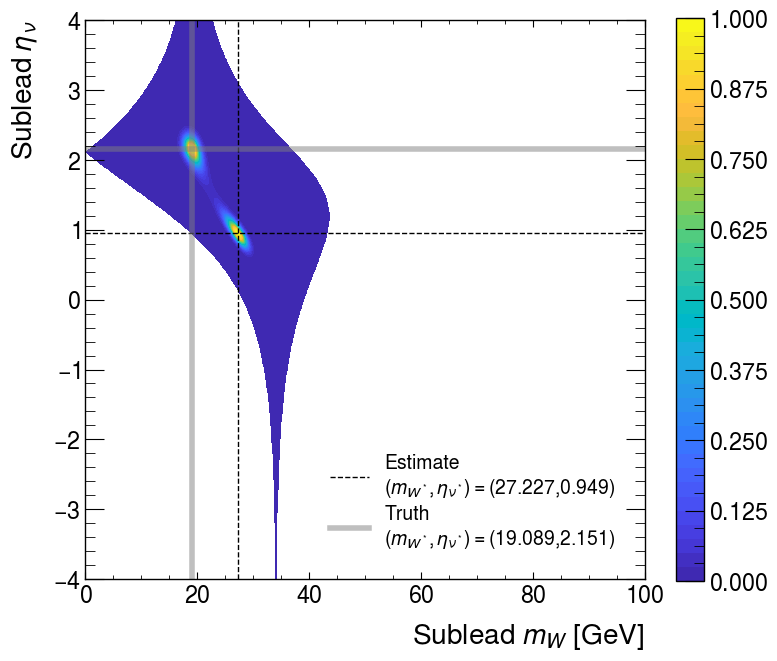

In [86]:
%%time
N_div = 1000
evt_id = np.random.choice(len(Higgs['E']))
#evt_id = random_events[0]
MH = 125
nu_eta_bin = np.linspace(-4,4,N_div)
W_sublead_m_bin = np.linspace(0,100,N_div)
X, Y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
MET_X = MET.at[evt_id,'px'] - LeadingNu.at[evt_id,'px']
MET_Y = MET.at[evt_id,'py'] - LeadingNu.at[evt_id,'py']
WL  = np.array([  SubleadW.at[evt_id,'E'],  SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz']])
LL  = np.array([SubleadLep.at[evt_id,'E'],SubleadLep.at[evt_id,'px'],SubleadLep.at[evt_id,'py'],SubleadLep.at[evt_id,'pz']])
VL  = np.array([ SubleadNu.at[evt_id,'E'], SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz']])
WH  = np.array([  LeadingW.at[evt_id,'E'],  LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz']])
WH_M2 = WH[0]**2 - WH[1]**2 - WH[2]**2 - WH[3]**2
WH_dot_LL = WH[0]*LL[0] - WH[1]*LL[1] - WH[2]*LL[2] - WH[3]*LL[3]
MH_truth  =      Higgs.at[evt_id,  'm']
MW_truth  =   SubleadW.at[evt_id,  'm']
eta_truth =  SubleadNu.at[evt_id,'eta']
ML  = SubleadLep.at[evt_id,  'm']
cosh_eta = np.cosh(Y)
sinh_eta = np.sinh(Y)
A = 0.5*(X**2) - ML**2
B = LL[0]*cosh_eta - LL[3]*sinh_eta
C = 0.5*(MH**2 - WH_M2 - X**2) - WH_dot_LL
D = WH[0]*cosh_eta - WH[3]*sinh_eta
YDB = LL[2]*D - WH[2]*B
XDB = LL[1]*D - WH[1]*B
F = (     A*WH[1] -     C*LL[1] )/XDB
G = ( LL[2]*WH[1] - WH[2]*LL[1] )/XDB
L0 = ( (A*D-C*B)**2 - ( XDB*F)**2 ) 
L1 = ( 2*(A*D-C*B)*YDB - 2*F*G*(XDB**2) )
L2 = ( YDB**2 +  (1 - G**2)*( XDB**2))
det = L1*L1 - 4*L0*L2
Y1 = (-1*L1 + np.sqrt(det))/(2*L2) 
Y2 = (-1*L1 - np.sqrt(det))/(2*L2) 
X1 = ((A*D-C*B) + YDB*Y1)/(-1*XDB)
X2 = ((A*D-C*B) + YDB*Y2)/(-1*XDB)
Z = np.where(np.exp(-0.5*(X1-MET_X)**2)* np.exp(-0.5*(Y1-MET_Y)**2) > np.exp(-0.5*(X2-MET_X)**2)* np.exp(-0.5*(Y2-MET_Y)**2), \
             np.exp(-0.5*(X1-MET_X)**2)* np.exp(-0.5*(Y1-MET_Y)**2),\
             np.exp(-0.5*(X2-MET_X)**2)* np.exp(-0.5*(Y2-MET_Y)**2))

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
y_est,x_est = np.unravel_index(np.nanargmax(Z), Z.shape)
#a = ax.imshow(Z,cmap=my_cmaps.parula('lightgray'),vmin=-0,vmax=1)
a = ax.contourf(X,Y,Z,cmap=my_cmaps.parula('lightgray'),vmin=0,vmax=1,levels=40)
#ax.invert_yaxis()
#ax.set_xlabel(r'Sublead $m_W = 0.08x$ [GeV]')
#ax.set_ylabel(r'Sublead $\eta_\nu = 0.006y - 3 $')
ax.axvline(W_sublead_m_bin[x_est],ls='dashed',c='k',lw=1)
ax.axhline(nu_eta_bin[y_est],ls='dashed',c='k',lw=1,\
           label='Estimate\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.3f,%.3f)'%(W_sublead_m_bin[x_est],nu_eta_bin[y_est]))
ax.axhline(eta_truth, alpha=0.5, c='grey', lw=4 )
ax.axvline(MW_truth , alpha=0.5, c='grey', lw=4, \
           label='Truth\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.3f,%.3f)'%(MW_truth,eta_truth))
ax.set_xlabel(r'Sublead $m_W$ [GeV]')
ax.set_ylabel(r'Sublead $\eta_\nu$')
fig.colorbar(a ,ax=ax,fraction=0.0455)
ax.set_box_aspect(1)
ax.legend()

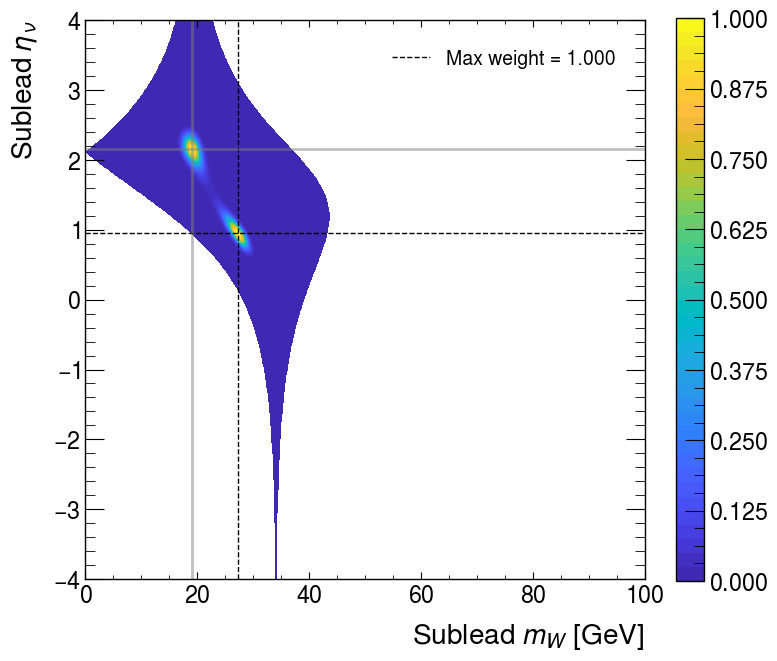

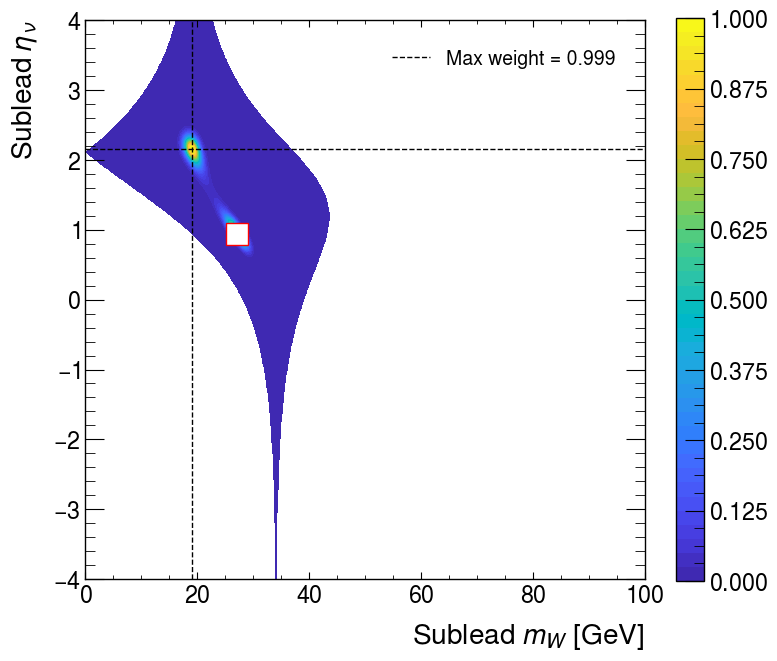

In [87]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
eta_range = 8
mw_range = 100
y_est,x_est = np.unravel_index(np.nanargmax(Z), Z.shape)
#a = ax.imshow(Z,cmap=my_cmaps.parula('lightgray'),vmin=-0,vmax=1)
a = ax.contourf(X,Y,Z,cmap=my_cmaps.parula('lightgray'),vmin=0,vmax=1,levels=40)
#ax.invert_yaxis()
#ax.set_xlabel(r'Sublead $m_W = 0.08x$ [GeV]')
#ax.set_ylabel(r'Sublead $\eta_\nu = 0.006y - 3 $')
ax.axvline(W_sublead_m_bin[x_est],ls='dashed',c='k',lw=1)
ax.axhline(nu_eta_bin[y_est],ls='dashed',c='k',lw=1,label = 'Max weight = {:.3f}'.format(Z[y_est,x_est]))
ax.axvline(MW_truth,c='grey',alpha=0.5)
ax.axhline(eta_truth,c='grey',alpha=0.5)
ax.set_xlabel(r'Sublead $m_W$ [GeV]')
ax.set_ylabel(r'Sublead $\eta_\nu$')
fig.colorbar(a ,ax=ax,fraction=0.0455)
ax.set_box_aspect(1)
ax.legend()
plt.show()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
r = 20
box = Rectangle([W_sublead_m_bin[x_est-r-1],nu_eta_bin[y_est-r-1]],2*r*(mw_range/N_div),2*r*(eta_range/N_div),edgecolor='r',facecolor='none')
Z[y_est-r:y_est+r,x_est-r:x_est+r] = np.nan
y_est,x_est = np.unravel_index(np.nanargmax(Z), Z.shape)
b = ax.contourf(X,Y,Z,cmap=my_cmaps.parula('lightgray'),vmin=0,vmax=1,levels=40)
#ax.invert_yaxis()
#ax.set_xlabel(r'Sublead $m_W = 0.08x$ [GeV]')
#ax.set_ylabel(r'Sublead $\eta_\nu = 0.006y - 3 $')
ax.axvline(W_sublead_m_bin[x_est],ls='dashed',c='k',lw=1)
ax.axhline(nu_eta_bin[y_est],ls='dashed',c='k',lw=1,label = 'Max weight = {:.3f}'.format(Z[y_est,x_est]))
#ax.axvline(MW_truth,c='grey',alpha=0.5)
#ax.axhline(eta_truth,c='grey',alpha=0.5)
ax.set_xlabel(r'Sublead $m_W$ [GeV]')
ax.set_ylabel(r'Sublead $\eta_\nu$')
ax.add_patch(box)
fig.colorbar(b ,ax=ax,fraction=0.0455)
ax.set_box_aspect(1)
ax.legend()
plt.show()


In [ ]:
%%time
evt_id = 2544839
evt_id = np.random.choice(len(Higgs['E']))
print(evt_id)
MET_X = MET.at[evt_id,'px'] - LeadingNu.at[evt_id,'px']
MET_Y = MET.at[evt_id,'py'] - LeadingNu.at[evt_id,'py']
WL  = np.array([  SubleadW.at[evt_id,'E'],  SubleadW.at[evt_id,'px'],  SubleadW.at[evt_id,'py'],  SubleadW.at[evt_id,'pz']])
LL  = np.array([SubleadLep.at[evt_id,'E'],SubleadLep.at[evt_id,'px'],SubleadLep.at[evt_id,'py'],SubleadLep.at[evt_id,'pz']])
VL  = np.array([ SubleadNu.at[evt_id,'E'], SubleadNu.at[evt_id,'px'], SubleadNu.at[evt_id,'py'], SubleadNu.at[evt_id,'pz']])
WH  = np.array([  LeadingW.at[evt_id,'E'],  LeadingW.at[evt_id,'px'],  LeadingW.at[evt_id,'py'],  LeadingW.at[evt_id,'pz']])
WH_M2 = WH[0]**2 - WH[1]**2 - WH[2]**2 - WH[3]**2
WH_dot_LL = WH[0]*LL[0] - WH[1]*LL[1] - WH[2]*LL[2] - WH[3]*LL[3]
MH = 125
MH_truth  =      Higgs.at[evt_id,  'm']
MW_truth  =   SubleadW.at[evt_id,  'm']
eta_truth =  SubleadNu.at[evt_id,'eta']
ML  = SubleadLep.at[evt_id,  'm']
N_div = 1000
nu_eta_bin = np.linspace(-3,3,N_div)
W_sublead_m_bin = np.linspace(0,80,N_div)
grid_x, grid_y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
weight = np.zeros((N_div,N_div))
max_weight = -99999
max_eta    = -99999
max_mw2    = -99999
tolerance  = 10000 
for i,eta in enumerate(nu_eta_bin):
    for j,MW in enumerate(W_sublead_m_bin):
        weight[i,j] = 0
        # calculating parameters
        cosh_eta = np.cosh(eta)
        sinh_eta = np.sinh(eta)
        A = 0.5*(MW**2 - ML**2) 
        B = LL[0]*cosh_eta - LL[3]*sinh_eta
        C = 0.5*(MH**2 - WH_M2 - MW**2) - WH_dot_LL
        D = WH[0]*cosh_eta - WH[3]*sinh_eta
        YDB = LL[2]*D - WH[2]*B
        XDB = LL[1]*D - WH[1]*B
        F = (     A*WH[1] -     C*LL[1] )/XDB
        G = ( LL[2]*WH[1] - WH[2]*LL[1] )/XDB
        L0 = ( (A*D-C*B)**2 - ( XDB*F)**2 ) 
        L1 = ( 2*(A*D-C*B)*YDB - 2*F*G*(XDB**2) )
        L2 = ( YDB**2 +  (1 - G**2)*( XDB**2))
        # solving quadratic equation
        det = L1*L1 - 4*L0*L2
        L0_prime = L0 - (tolerance*np.abs(L2)/L2)
        det_prime = L1*L1 - 4*L0_prime*L2
        if det >= 0 : 
            Y1 = (-1*L1 + np.sqrt(det))/(2*L2) 
            Y2 = (-1*L1 - np.sqrt(det))/(2*L2) 
            X1 = ((A*D-C*B) + YDB*Y1)/(-1*XDB)
            X2 = ((A*D-C*B) + YDB*Y2)/(-1*XDB)
            weight[i,j] = max( weight_eq( X1,MET_X , Y1,MET_Y ) , weight_eq( X2,MET_X ,Y2,MET_Y ) )
        elif  det_prime >= 0 :
            Y1 = (-1*L1 + np.sqrt(det_prime))/(2*L2) 
            Y2 = (-1*L1 + np.sqrt(det_prime))/(2*L2) 
            X1 = ((A*D-C*B) + YDB*Y1)/(-1*XDB)
            X2 = ((A*D-C*B) + YDB*Y2)/(-1*XDB)
            weight[i,j] = max( weight_eq( X1,MET_X , Y1,MET_Y ) , weight_eq( X2,MET_X , Y2,MET_Y ) )
        elif det_prime < 0 :
            weight[i,j] = -1
        if weight[i,j] > max_weight:
            max_weight = weight[i,j]
            max_eta = eta
            max_mw2 = MW
            


In [ ]:
plt.style.use(hep.style.ATLAS)
fig, ax = plt.subplots(figsize=(10,10),tight_layout=True)
ax.set_title(r'$\mathcal{W}(m_{W},\eta_{\nu}) = \exp\left[-({P}^x_{\nu} - P^x_\mathrm{miss})^2\right]\exp\left[-({P}^y_{\nu} - P^y_\mathrm{miss})^2\right]$',pad=20,fontsize=20)
#hep.atlas.label(ax=ax,loc=1,fontsize=20)
#hep.atlas.label(ax=ax,loc = 4, rlabel=f'Event #{evt_id}',fontsize=20)

ax.set_xlabel("Mass of W boson (parent of subleading lepton) [GeV]")
ax.set_ylabel("Pseudorapidity of neutrino (paired with subleading lepton)")
#my_cmap = my_cmaps.kViridis()
my_cmap = mpl.cm.get_cmap("viridis").copy()
my_cmap.set_under('lightgray')
ax.contourf(grid_x, grid_y, weight,vmin=0,cmap=my_cmaps.parula('white'))
#ax.contourf(grid_x, grid_y, weight, vmin=0,cmap=my_cmap)

ax.axhline(eta_truth, alpha=0.5, c='grey', lw=4 )
ax.axvline(MW_truth , alpha=0.5, c='grey', lw=4, \
           label='Truth\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(MW_truth,eta_truth))

ax.axhline(max_eta, ls='dashed', c='k', lw=2)
ax.axvline(max_mw2, ls='dashed', c='k', lw=2,\
           label='Estimate\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(max_mw2,max_eta))

ax.legend(loc = 4, prop={'size':20})
plt.show()

In [ ]:
%%time

sigma_x = np.std(SubleadNu['px'])
sigma_y = np.std(SubleadNu['py'])
evtid = np.random.choice(len(Higgs['E']))
#evtid=497323
N_div = 1000
mH = 125
nu_eta_bin = np.linspace(-3,3,N_div)
W_sublead_m_bin = np.linspace(0,80,N_div)
grid_x, grid_y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
weight = np.zeros((N_div,N_div))
max_weight = -99999
max_eta = -99999
max_mw2 = -99999
for i,nu_eta in enumerate(nu_eta_bin):
    for j,W_sublead_m in enumerate(W_sublead_m_bin):
        weight[i,j] = 0
        
        El_prime = SubleadLep.at[evtid,'E']*np.cosh(nu_eta) - SubleadLep.at[evtid,'pz']*np.sinh(nu_eta)
        Eb_prime = LeadingW.at[evtid,'E']*np.cosh(nu_eta) - LeadingW.at[evtid,'pz']*np.sinh(nu_eta)
        # check 
        A = (SubleadLep.at[evtid,'py']*Eb_prime - LeadingW.at[evtid,'py']*El_prime)/(-1*SubleadLep.at[evtid,'px']*Eb_prime + LeadingW.at[evtid,'px']*El_prime)
        # check 
        par1 = (SubleadLep.at[evtid,'px'] * A + SubleadLep.at[evtid,'py'])/El_prime
        # check 
        C = A*A+1 - par1*par1
        # check 
        lep_dot_w = LeadingW.at[evtid,'E' ]*SubleadLep.at[evtid,'E' ] - \
                    LeadingW.at[evtid,'px']*SubleadLep.at[evtid,'px'] - \
                    LeadingW.at[evtid,'py']*SubleadLep.at[evtid,'py'] - \
                    LeadingW.at[evtid,'pz']*SubleadLep.at[evtid,'pz']
        B = (El_prime * (mH*mH - W_sublead_m*W_sublead_m - LeadingW.at[evtid,'m']**2 - 2*lep_dot_w) - Eb_prime*W_sublead_m*W_sublead_m)/(2*(SubleadLep.at[evtid,'px']*Eb_prime - LeadingW.at[evtid,'px']*El_prime))
        # check 
        par2 = (W_sublead_m*W_sublead_m*0.5 + B*SubleadLep.at[evtid,'px'])/El_prime
        # check 
        D = 2*(A*B - par2*par1)
        # check 
        F = B*B - par2*par2
        # check 
        det = D*D - 4*C*F
        # check 
        if det < 0:
            weight[i,j] = -1
        elif det == 0:
            py1 = -D/(2*C)
            px1 = A*py1 + B
            dy1 = (py1 - MET.at[evtid,'py'] + LeadingNu.at[evtid,'py'])#/(MET.at[evtid,'py'] - LeadingNu.at[evtid,'py'])
            dx1 = (px1 - MET.at[evtid,'px'] + LeadingNu.at[evtid,'px'])#/(MET.at[evtid,'px'] - LeadingNu.at[evtid,'px'])
            weight[i,j] = np.exp(-1*dy1*dy1)*np.exp(-1*dx1*dx1)
            #pT2_1 = px1*px1 + py1*py1
            #pz1 = np.sqrt(PT2_1)*np.sinh(nu_eta)
        elif det>0:
            py1 = (-D + np.sqrt(det))/(2*C)
            py2 = (-D - np.sqrt(det))/(2*C)
            px1 = A*py1 + B
            px2 = A*py2 + B
            dy1 = (py1 - MET.at[evtid,'py'] + LeadingNu.at[evtid,'py'])#/(MET.at[evtid,'py'] - LeadingNu.at[evtid,'py'])
            dx1 = (px1 - MET.at[evtid,'px'] + LeadingNu.at[evtid,'px'])#/(MET.at[evtid,'px'] - LeadingNu.at[evtid,'px'])
            dy2 = (py2 - MET.at[evtid,'py'] + LeadingNu.at[evtid,'py'])#/(MET.at[evtid,'py'] - LeadingNu.at[evtid,'py'])
            dx2 = (px2 - MET.at[evtid,'px'] + LeadingNu.at[evtid,'px'])#/(MET.at[evtid,'px'] - LeadingNu.at[evtid,'px'])
            weight1 = np.exp(-1*dy1*dy1)*np.exp(-1*dx1*dx1)
            weight2 = np.exp(-1*dy2*dy2)*np.exp(-1*dx2*dx2)
            weight[i,j] = max(weight1,weight2)
        if weight[i,j] > max_weight:
            max_weight = weight[i,j]
            max_eta = nu_eta
            max_mw = W_sublead_m
            
plt.style.use(hep.style.ATLAS)
fig, ax = plt.subplots(figsize=(10,10),tight_layout=True)
ax.set_title(r'$\mathcal{W}(m_{W},\eta_{\nu}) = \exp\left[-({P}^x_{\nu} - P^x_\mathrm{miss})^2\right]\exp\left[-({P}^y_{\nu} - P^y_\mathrm{miss})^2\right]$',pad=20,fontsize=20)
#hep.atlas.label(ax=ax,loc=1,fontsize=20)
hep.atlas.label(ax=ax,loc = 4, rlabel=f'Event #{evtid}',fontsize=20)
ax.set_xlabel("Mass of W boson (parent of subleading lepton) [GeV]")
ax.set_ylabel("Pseudorapidity of neutrino (paired with subleading lepton)")
#my_cmap = my_cmaps.kViridis()
my_cmap = my_cmaps.parula()
my_cmap.set_under('w')
ax.contourf(grid_x, grid_y, weight, vmin=0,cmap=my_cmap)
ax.axvline(SubleadW.at[evtid,'m'], alpha=0.5, c='grey', lw=4, label='Truth\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(SubleadW.at[evtid,'m'],SubleadNu.at[evtid,'eta']))
ax.axhline(SubleadNu.at[evtid, 'eta'],alpha=0.5, c='grey', lw=4 )
ax.axvline(max_mw, ls='dashed', c='k', lw=2, label='Estimate\n'+r'$(m_{W^*},\eta_{\nu^*})=$(%.4f,%.4f)'%(max_mw,max_eta))
ax.axhline(max_eta, ls='dashed', c='k', lw=2)
ax.legend(loc = 6, prop={'size':20})
plt.show()

# Neural Network

In [5]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
print(tf.__version__)
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#from lbn import LBN,LBNLayer


2024-03-08 04:37:47.717262: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 04:37:47.717387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 04:37:47.783008: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 04:37:48.388993: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.15.0


In [12]:
def my_leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)

In [109]:
sample_size   = 120000
np.random.seed(11)
sample_events = np.random.choice(len(Higgs['pz']),size=sample_size,replace=False)
sample_events = np.where(Higgs['m']>-99999,True,False)
training_data = pd.DataFrame()
#data_label    = np.cos( LeadingNu['phi']-SubleadNu['phi'] ) 

#data_label    = np.stack([ (LeadingW['pt']-np.mean(LeadingW['pt']))/np.std(LeadingW['pt']),
#                            LeadingW['phi']/(np.pi)],axis=-1)
#data_label    = LeadingW['pz']
data_label    = np.stack([ (LeadingW['E' ]-np.mean(LeadingW['E' ]))/np.std(LeadingW['E' ]),
                           (LeadingW['px']-np.mean(LeadingW['px']))/np.std(LeadingW['px']),
                           (LeadingW['py']-np.mean(LeadingW['py']))/np.std(LeadingW['py']),
                           (LeadingW['pz']-np.mean(LeadingW['pz']))/np.std(LeadingW['pz']) ],axis=-1)
'''
data_label    = np.stack([ LeadingW['E' ],
                           LeadingW['px'],
                           LeadingW['py'],
                           LeadingW['pz']],axis=-1)#data_std      = np.std(data_label)
'''
data_mean     = np.mean(data_label)
data_std      = np.std(data_label)
features = ['lep1_E','lep1_px','lep1_py','lep1_pz',\
            'lep2_E','lep2_px','lep2_py','lep2_pz',\
            'diNu_E','diNu_px','diNu_py','diNu_pz']
training_data['lep1_E' ] = LeadingLep['E' ][sample_events]
training_data['lep1_px'] = LeadingLep['px'][sample_events]
training_data['lep1_py'] = LeadingLep['py'][sample_events]
training_data['lep1_pz'] = LeadingLep['pz'][sample_events]
training_data['lep2_E' ] = SubleadLep['E' ][sample_events]
training_data['lep2_px'] = SubleadLep['px'][sample_events]
training_data['lep2_py'] = SubleadLep['py'][sample_events]
training_data['lep2_pz'] = SubleadLep['pz'][sample_events]
training_data['diNu_E' ] = np.full(len(sample_events),diNeutrino['E'].mean()) # diNu E mean as placeholder
#training_data['diNu_E' ] = diNeutrino['E' ][sample_events] # diNu E mean as placeholder
training_data['diNu_px'] = diNeutrino['px'][sample_events]
training_data['diNu_py'] = diNeutrino['py'][sample_events]
training_data['diNu_pz'] = np.full(len(sample_events),diNeutrino['pz'].mean()) # diNu Pz mean as placeholder
#training_data['diNu_pz'] = diNeutrino['pz'][sample_events] # diNu Pz mean as placeholder
#training_data['label'  ] = (data_label[sample_events]-data_mean)/data_std
#training_data['label'] = data_label[sample_events]
training_data.columns

Index(['lep1_E', 'lep1_px', 'lep1_py', 'lep1_pz', 'lep2_E', 'lep2_px',
       'lep2_py', 'lep2_pz', 'diNu_E', 'diNu_px', 'diNu_py', 'diNu_pz'],
      dtype='object')

In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1) # normalize along column (normalize feature value)
normalizer.adapt(training_data)
#normalizer.adapt(training_data)#.iloc[::,0:-1])
print(normalizer.mean)

tf.Tensor(
[[ 1.2280206e+02 -1.9861884e-02  2.1675989e-02  1.8998288e-01
   7.5168686e+01 -2.0574899e-02  1.1815031e-03  6.4142525e-02
   1.6535614e+02 -2.0955931e-02 -3.7755354e-03  2.3409396e-01]], shape=(1, 12), dtype=float32)


In [110]:
train_set,test_set,train_label,test_label = train_test_split(training_data,data_label[sample_events,:],test_size=2/5,random_state = 83)#,random_state=221)
test_set , val_set, test_label, val_label = train_test_split(test_set,test_label,test_size=1/2,random_state=83)#,random_state=221)#train_set,test_set,train_label,test_label = train_test_split(training_data,data_label[sample_events],test_size=2/5,random_state=221)
#for i in [train_set,test_set,val_set,train_label,test_label,val_label]:
#    i = tf.convert_to_tensor(i)
print("Training    data shape: ",  train_set.shape)
print("Training   label shape: ",train_label.shape)
print("Testing     data shape: ",   test_set.shape)
print("Testing    label shape: ", test_label.shape)
print("Validation  data shape: ",    val_set.shape)
print("Validation label shape: ",  val_label.shape)

Training    data shape:  (827902, 12)
Training   label shape:  (827902, 4)
Testing     data shape:  (275967, 12)
Testing    label shape:  (275967, 4)
Validation  data shape:  (275968, 12)
Validation label shape:  (275968, 4)


In [ ]:
new_model = tf.keras.models.load_model('W0_P4_LBN_256_128_64_32_16.h5')

In [15]:
nodes = [ 256 , 128 ,  64 ,  32 ,  16]
drop  = [ 1/8 , 1/8 , 1/8 , 1/8 , 1/8]
#drop = [0,0,0,0]
depth = len(nodes)
config={
    "LBN_shape":(3,4),
    "LBN_part":8,
    "LBN_mode":"pairs",
    
    "layer_0":nodes[0],
    "dropout_0":drop[0],
    "activation_0":"elu",
    "initialization_0":"normal",
    
    "layer_1":nodes[1],
    "dropout_1":drop[1],
    "activation_1":"elu",
    "initialization_1":"normal",
    
    "layer_2":nodes[2],
    "dropout_2":drop[2],
    "activation_2":"elu",
    "initialization_2":"normal",

    "layer_3":nodes[3],
    "dropout_3":drop[3],
    "activation_3":"elu",
    "initialization_3":"normal",
    
    "layer_4":nodes[4],
    "dropout_4":drop[4],
    "activation_4":"elu",
    "initialization_4":"normal",
    

    "learning_rate":0.0001,
    "optimizer":"Adam",
    "loss":"mean_squared_error",
    "epoch":1000,
    "batch_size":800,
}
'''
        "layer_5":nodes[5],
        "dropout_5":drop[5],
        "activation_5":"elu",
        "initialization_5":"normal",
     
'''
NN_model = tf.keras.models.Sequential([
    normalizer,
    #layers.Reshape(config['LBN_shape']),
    #LBNLayer(config['LBN_shape'],config['LBN_part'],boost_mode=config['LBN_mode']),
    layers.Dense(config['layer_0'],activation=config['activation_0'],kernel_initializer=config['initialization_0']),
    layers.Dropout(config['dropout_0']),
    layers.Dense(config['layer_1'],activation=config['activation_1'],kernel_initializer=config['initialization_1']),
    layers.Dropout(config['dropout_1']),
    layers.Dense(config['layer_2'],activation=config['activation_2'],kernel_initializer=config['initialization_2']),
    layers.Dropout(config['dropout_2']),
    layers.Dense(config['layer_3'],activation=config['activation_3'],kernel_initializer=config['initialization_3']),
    layers.Dropout(config['dropout_3']),
    layers.Dense(config['layer_4'],activation=config['activation_4'],kernel_initializer=config['initialization_4']),
    layers.Dropout(config['dropout_4']),
    layers.Dense(4,kernel_initializer='normal')
])
NN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=config['learning_rate']),
    loss=config['loss'],
)
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 12)                25        
 tion)                                                           
                                                                 
 dense_12 (Dense)            (None, 256)               3328      
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                      

In [16]:
cb = []
#def scheduler(epoch, lr):
#  if epoch < 100:
#    return lr
#  else:
#    return lr * tf.math.exp(-0.01)
#cb.append(tf.keras.callbacks.LearningRateScheduler(scheduler))
step_size = len(train_label)/config['batch_size']
init_epoch = 0
cb.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,start_from_epoch=500))

history = NN_model.fit(
    batch_size=config['batch_size'],
    epochs=config['epoch'],
    x=train_set,
    y=train_label,
    validation_data=(val_set,val_label),
    use_multiprocessing=True,
    callbacks=cb,
    initial_epoch = init_epoch
)
loss_epoch = history.history['loss']
validation_loss = history.history['val_loss']

Epoch 1/1000
1035/1035 [==============================] - 13s 12ms/step - loss: 0.4552 - val_loss: 0.1910
Epoch 2/1000
1035/1035 [==============================] - 12s 12ms/step - loss: 0.2452 - val_loss: 0.1797
Epoch 3/1000
1035/1035 [==============================] - 12s 12ms/step - loss: 0.2370 - val_loss: 0.1780
Epoch 4/1000
1035/1035 [==============================] - 12s 12ms/step - loss: 0.2344 - val_loss: 0.1780
Epoch 5/1000
1035/1035 [==============================] - 12s 12ms/step - loss: 0.2317 - val_loss: 0.1759
Epoch 6/1000
1035/1035 [==============================] - 13s 12ms/step - loss: 0.2307 - val_loss: 0.1753
Epoch 7/1000
1035/1035 [==============================] - 13s 12ms/step - loss: 0.2298 - val_loss: 0.1739
Epoch 8/1000
1035/1035 [==============================] - 12s 12ms/step - loss: 0.2287 - val_loss: 0.1744
Epoch 9/1000
1035/1035 [==============================] - 12s 12ms/step - loss: 0.2278 - val_loss: 0.1728
Epoch 10/1000
1035/1035 [=====================

4469/8624 [==============>...............] - ETA: 4s

KeyboardInterrupt: 

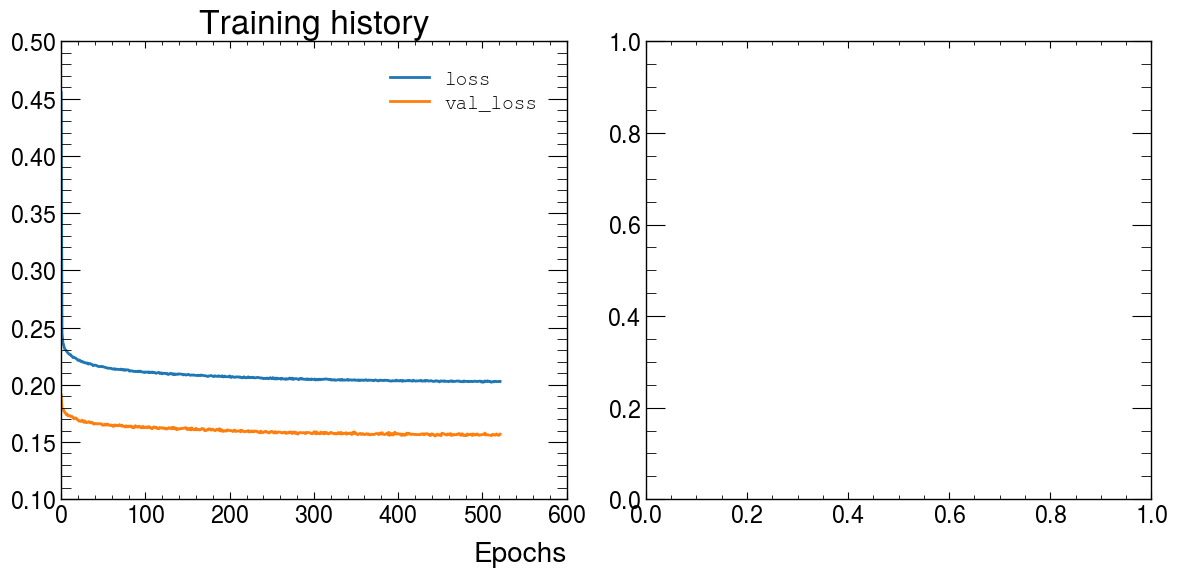

In [112]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),tight_layout=True)
ax = ax.flatten()
ax[0].plot(loss_epoch,label='loss')
ax[0].plot(validation_loss,label='val_loss')
ax[0].set_title("Training history")
ax[0].set_xlabel("Epochs")
ax[0].legend(prop=verb)
#test_pred = NN_model.predict(test_set)#[:,0]#[::,0,0]
ax[1].set_title("Absolute relative error")
ax[1].hist(np.abs(test_pred[:,0]/test_label[:,0] - 1),range = [0,5],bins=50,histtype='step',lw=2,label = 'target_E')
ax[1].hist(np.abs(test_pred[:,1]/test_label[:,1] - 1),range = [0,5],bins=50,histtype='step',lw=2,label = 'target_Px')
ax[1].hist(np.abs(test_pred[:,2]/test_label[:,2] - 1),range = [0,5],bins=50,histtype='step',lw=2,label = 'target_Py')
ax[1].hist(np.abs(test_pred[:,3]/test_label[:,3] - 1),range = [0,5],bins=50,histtype='step',lw=2,label = 'target_Pz')
#ax[1].hist(np.abs(test_pred/test_label - 1),range = [0,4],bins=50,histtype='step',lw=2,label = 'target_0')
#ax[1].hist(np.abs(test_pred/test_label - 1),range = [0,4],bins=50,histtype='step',lw=2,label = 'target_1')
ax[1].legend(prop=verb)
#ax[1].set_xlim((-5,5))
#ax[1].set_ylim((-5,5))
#ax[2].set_title(r"Standardization inverted")
#filename = '../NN 20231217/NN_{}'.format(i)
#for j in nodes:
#    filename = filename + '_{}'.format(j)
#filename = filename+'.png'
#plt.savefig(filename)
plt.show()

In [108]:
NN_model.save('W0_P4_256_128_64_32_16')

INFO:tensorflow:Assets written to: W0_P4_256_128_64_32_16/assets


INFO:tensorflow:Assets written to: W0_P4_256_128_64_32_16/assets


In [113]:
new_model = tf.keras.models.load_model('W0_P4_256_128_64_32_16/')
test_pred = new_model.predict(test_set)

8624/8624 [==============================] - 11s 1ms/step


In [19]:
test_label_invert = test_label
test_pred_invert = test_pred
for i,j in enumerate(['E','px','py','pz']):
    #test_label_invert[:,i] = test_label[:,i]*SubleadW[j].std() + SubleadW[j].mean()
    #test_pred_invert[ :,i] = test_pred[ :,i]*SubleadW[j].std() + SubleadW[j].mean()
    test_label_invert[:,i] = test_label[:,i]*LeadingW[j].std() + LeadingW[j].mean()
    test_pred_invert[ :,i] = test_pred[ :,i]*LeadingW[j].std() + LeadingW[j].mean()

In [93]:

a = np.where(test_pred_invert[:,0]**2 - test_pred_invert[:,1]**2 - test_pred_invert[:,2]**2 - test_pred_invert[:,3]**2 > 0, True, False)

/tmp/ipykernel_123742/1885674376.py:11: RuntimeWarning: divide by zero encountered in divide
  ax[1].vlines( truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) ),1,(pred_bar)/truth_bar,color='k',lw=1)#,align='edge')
/tmp/ipykernel_123742/1885674376.py:12: RuntimeWarning: divide by zero encountered in divide
  ax[1].scatter(truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) )  ,(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')


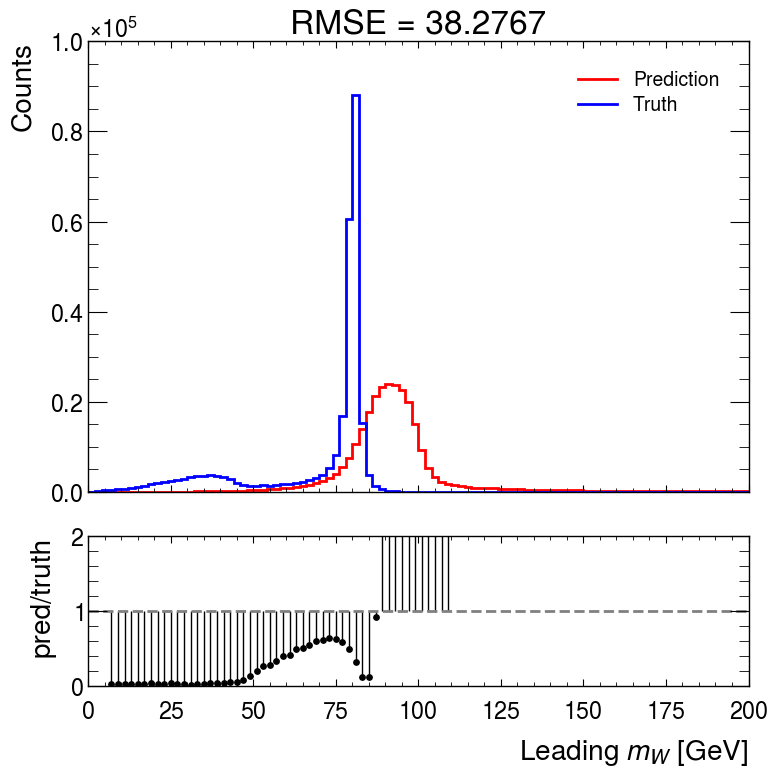

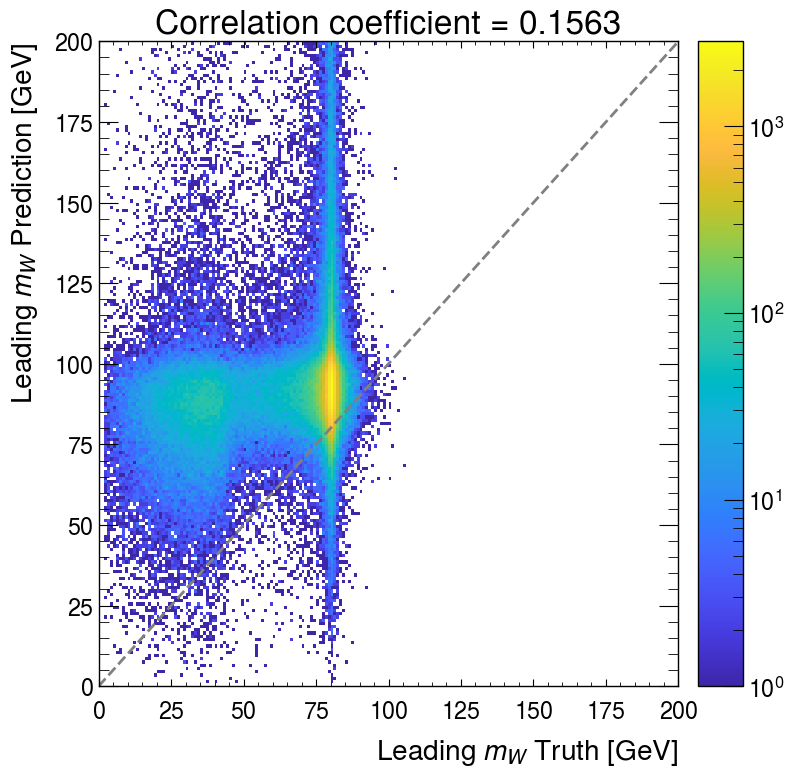

In [106]:
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [6,2]},sharex='col',tight_layout=True)
mass_pred = np.sqrt(test_pred_invert[a,0]**2 - test_pred_invert[a,1]**2 - test_pred_invert[a,2]**2 - test_pred_invert[a,3]**2)
mass_true = np.sqrt(test_label_invert[a,0]**2 - test_label_invert[a,1]**2 - test_label_invert[a,2]**2 - test_label_invert[a,3]**2)
pred_bar, pred_bin = np.histogram(mass_pred, bins = 100,range=[0,200])
truth_bar, truth_bin = np.histogram(mass_true, bins = 100,range=[0,200])
rmse= np.sqrt(np.mean((mass_pred - mass_true)**2))
hep.histplot(pred_bar,pred_bin,ax=ax[0],histtype='step',label='Prediction',color='r',lw=2)
hep.histplot(true_bar,true_bin,ax=ax[0],histtype='step',label='Truth',color='b',lw=2)
ax[0].set_title("RMSE = {:.4f}".format(rmse))
ax[0].legend()
ax[1].vlines( truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) ),1,(pred_bar)/truth_bar,color='k',lw=1)#,align='edge')
ax[1].scatter(truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) )  ,(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"Leading $m_{W}$ [GeV]")
ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.0f'))
ax[1].tick_params(axis='x',pad=10)
ax[0].set_ylabel("Counts")
ax[1].set_ylabel("pred/truth")
plt.show()  
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
plt_bins=200
plot_z, plot_x, plot_y = np.histogram2d(mass_true,mass_pred,bins=[200,200],range=[[0,200],[0,200]])
hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
hep.box_aspect(ax=ax,aspect=1)
ax.set_ylabel(r"Leading $m_{W}$ Prediction [GeV]")
ax.set_xlabel(r"Leading $m_{W}$ Truth [GeV]")
ax.tick_params(axis='x',pad=10)
coef = np.corrcoef(mass_pred,mass_true)[0,1]
ax.axline((-1,-1),(1,1),ls='dashed',color='gray')
ax.set_title("Correlation coefficient = {:.4f}".format(coef))
plt.show()

/tmp/ipykernel_123742/1634216819.py:17: RuntimeWarning: invalid value encountered in divide
  ax[1].vlines( truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) ),1,(pred_bar)/truth_bar,color='k',lw=1)#,align='edge')
/tmp/ipykernel_123742/1634216819.py:18: RuntimeWarning: invalid value encountered in divide
  ax[1].scatter(truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) )  ,(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')


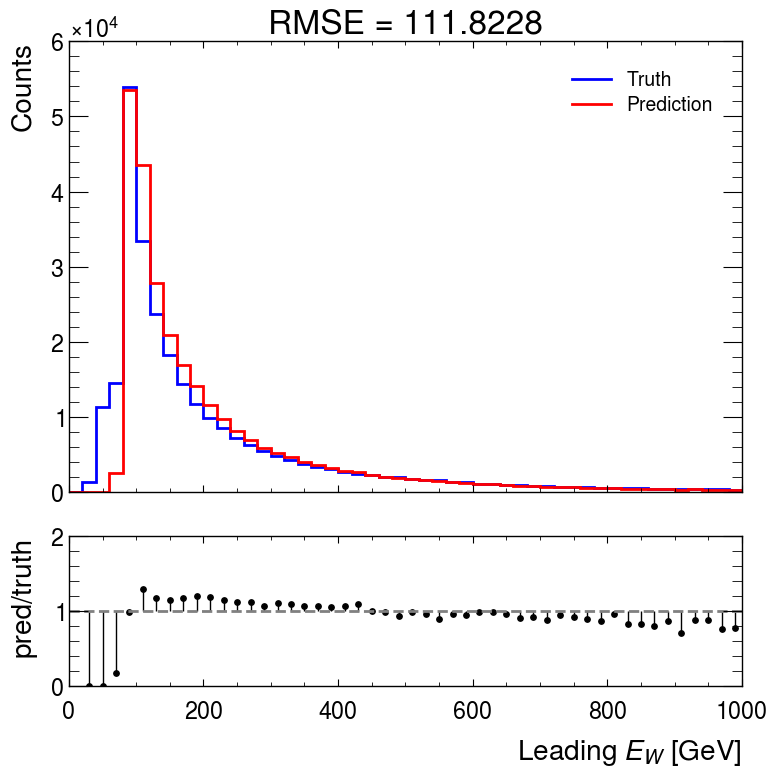

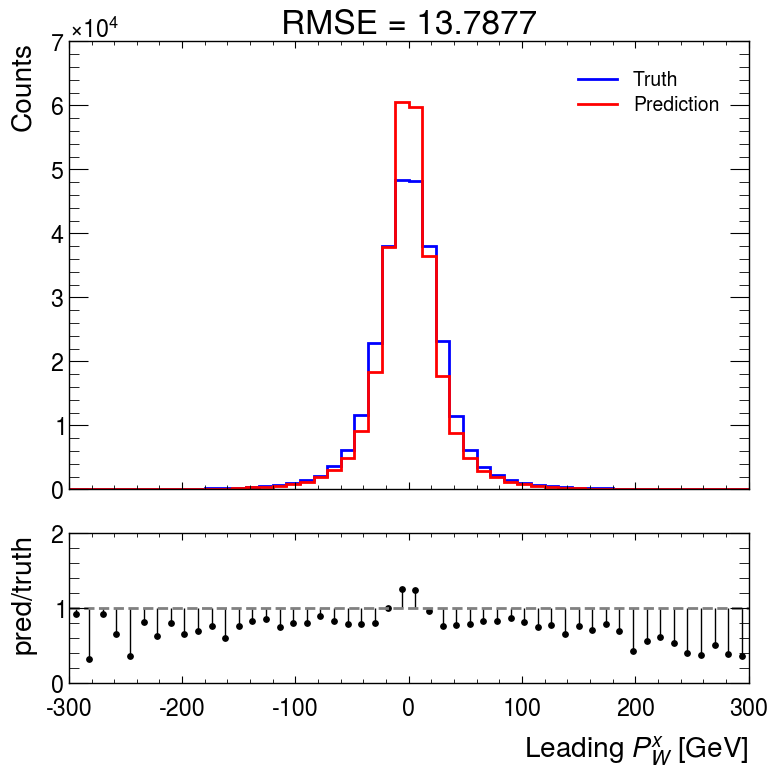

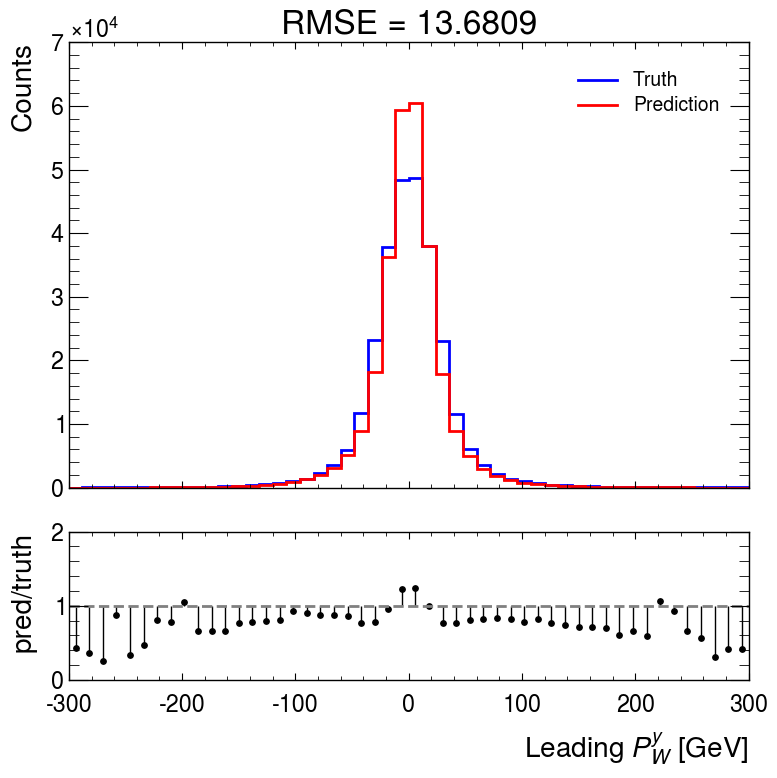

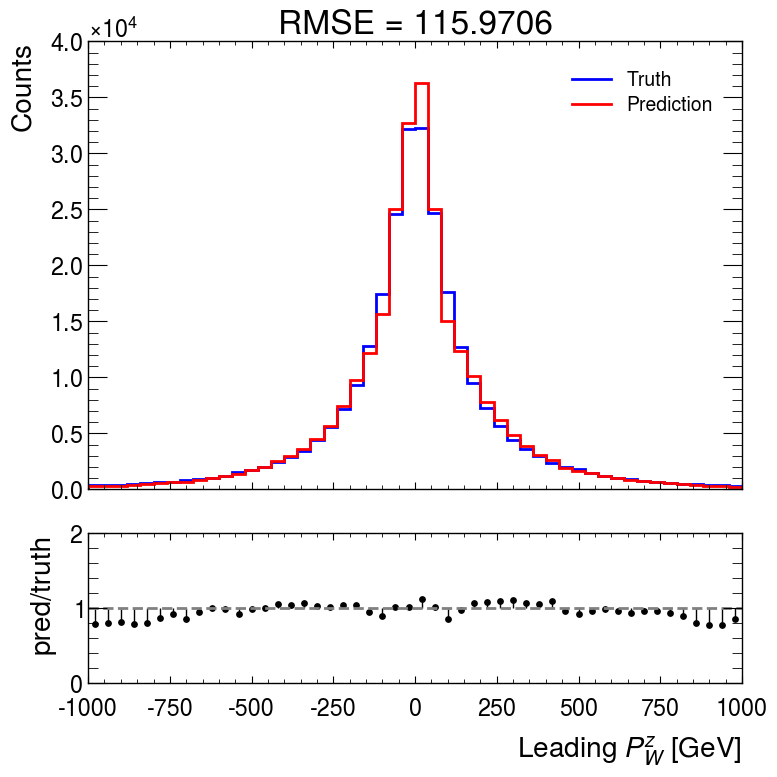

In [20]:
#ax = ax.flatten()
plt_bins = 50
for i,j in enumerate([0,1,2,3]): 
    fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [6,2]},sharex='col',tight_layout=True)
    #[0,1,2,3]
    #[E,x,y,z]
    if i == 1 or i == 2 : plt_range = [-300,300]
    if i == 0: plt_range = [0,1000]
    if i == 3: plt_range = [-1000,1000]
    rmse= np.sqrt(np.mean((test_label_invert[:,j] - test_pred_invert[:,j])**2))
    truth_bar,truth_bin = np.histogram(test_label_invert[:,j],bins=plt_bins,range=plt_range)
    pred_bar,pred_bin   = np.histogram(test_pred_invert[:,j],bins=plt_bins,range=plt_range)
    hep.histplot(truth_bar,truth_bin,ax=ax[0],histtype='step',lw=2,label='Truth',color='b')
    hep.histplot(pred_bar,pred_bin,ax=ax[0],histtype='step',lw=2,label='Prediction',color='r')
    ax[0].set_title("RMSE = {:.4f}".format(rmse))
    ax[0].legend()
    ax[1].vlines( truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) ),1,(pred_bar)/truth_bar,color='k',lw=1)#,align='edge')
    ax[1].scatter(truth_bin[0:-1]+( (plt_range[1]-plt_range[0])/(plt_bins*2) )  ,(pred_bar)/truth_bar,color='k',lw=1,s=15,label='')#,align='edge')
    ax[1].set_ylim([0,2])
    ax[1].axhline(1,c='grey',ls='dashed')
    if i == 1: ax[1].set_xlabel(r"Leading $P^x_{W}$ [GeV]")
    if i == 2: ax[1].set_xlabel(r"Leading $P^y_{W}$ [GeV]")
    if i == 3: ax[1].set_xlabel(r"Leading $P^z_{W}$ [GeV]")
    if i == 0: ax[1].set_xlabel(r"Leading $E_{W}  $ [GeV]")
    ax[1].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.0f'))
    ax[1].tick_params(axis='x',pad=10)
    ax[0].set_ylabel("Counts")
    ax[1].set_ylabel("pred/truth")
    plt.show()

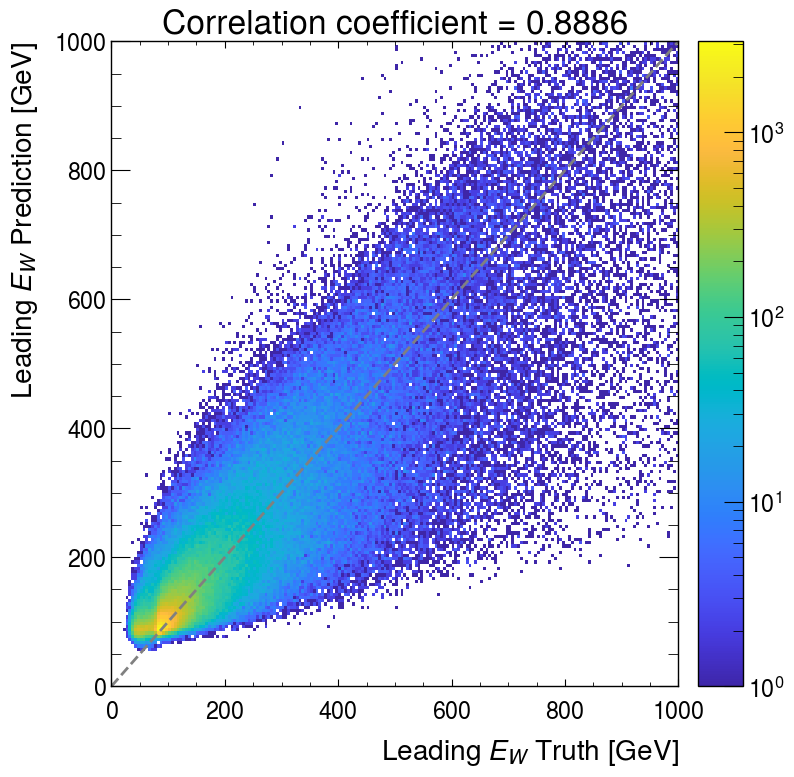

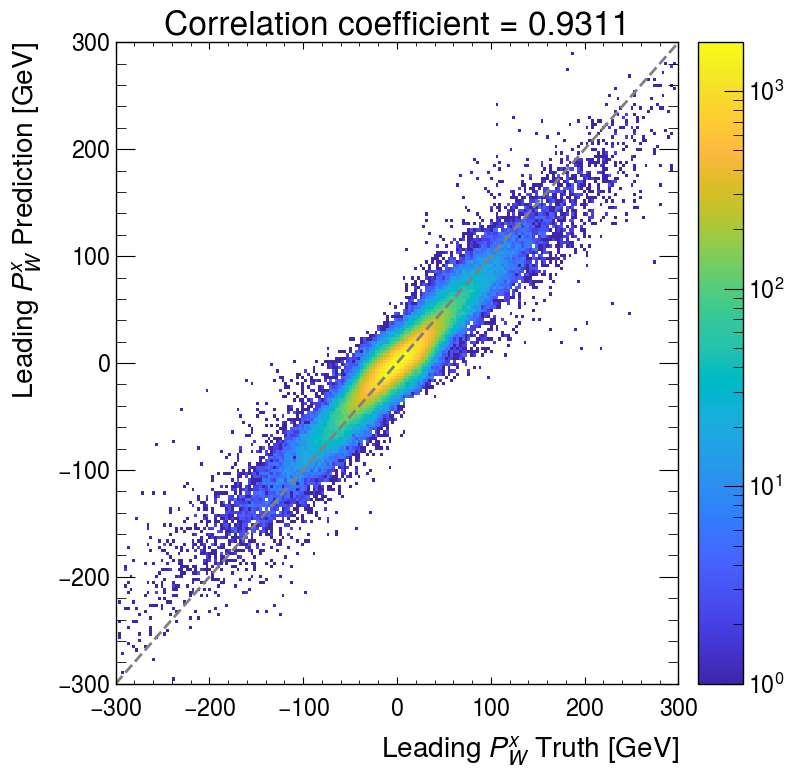

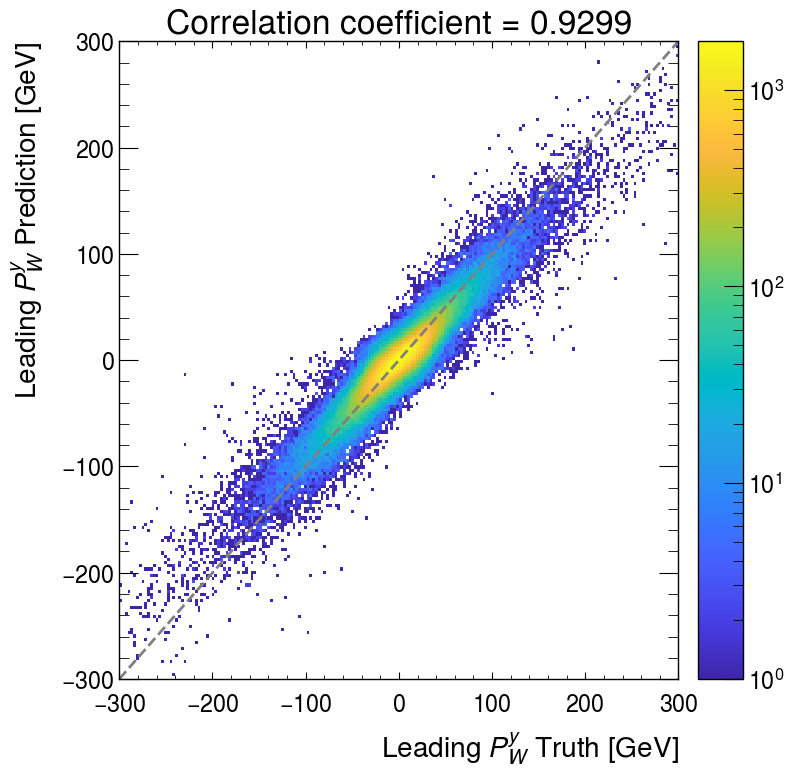

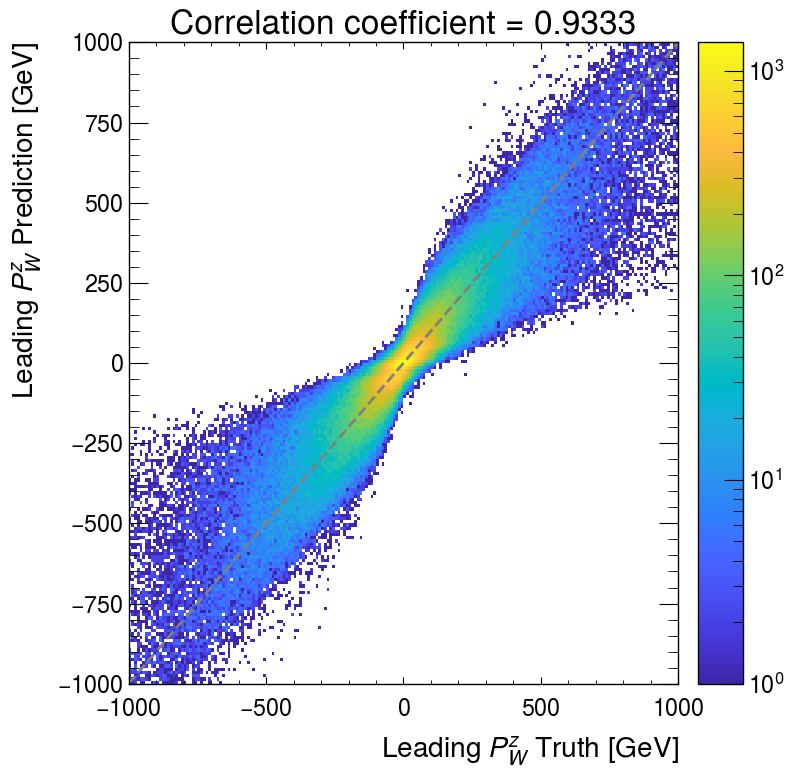

In [21]:
for i ,j in enumerate([0,1,2,3]):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8),tight_layout=True)
    plt_bins=200
    if i == 1 or i == 2 : plt_range = [-300,300]
    if i == 0: plt_range = [0,1000]
    if i == 3: plt_range = [-1000,1000]
    plot_z, plot_x, plot_y = np.histogram2d(test_label_invert[:,j],test_pred_invert[:,j],bins=[plt_bins,plt_bins],range=[plt_range,plt_range])
    hep.hist2dplot(plot_z, plot_x, plot_y,cmap=my_cmaps.parula('lightgray'),ax=ax,norm=mpl.colors.LogNorm())
    hep.box_aspect(ax=ax,aspect=1)
    if i == 1:
        ax.set_ylabel(r"Leading $P^x_{W}$ Prediction [GeV]")
        ax.set_xlabel(r"Leading $P^x_{W}$ Truth [GeV]")
    if i == 2:
        ax.set_ylabel(r"Leading $P^y_{W}$ Prediction [GeV]")
        ax.set_xlabel(r"Leading $P^y_{W}$ Truth [GeV]")
    if i == 3:
        ax.set_ylabel(r"Leading $P^z_{W}$ Prediction [GeV]")
        ax.set_xlabel(r"Leading $P^z_{W}$ Truth [GeV]")
    if i == 0:
        ax.set_ylabel(r"Leading $E_{W}$ Prediction [GeV]")
        ax.set_xlabel(r"Leading $E_{W}$ Truth [GeV]")
    ax.tick_params(axis='x',pad=10)
    coef = np.corrcoef(test_pred_invert[:,j],test_label_invert[:,j])[0,1]
    ax.axline((-1,-1),(1,1),ls='dashed',color='gray')
    ax.set_title("Correlation coefficient = {:.4f}".format(coef))
    plt.show()